# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтоб были одни и те же реализации распределения  

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=68b0b225ed274253d0219d2eea7d42d965ea514da85c6ab2e7e967e1ee718589
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [5]:
from ydata_profiling import ProfileReport

print("Количество пропущенных значений по колонкам:", df_train.isnull().sum())

columns_with_nulls = df_train.columns[df_train.isnull().any()].tolist()
print("\nКолонки с пропущенными значениями:", columns_with_nulls)

duplicates = df_train.duplicated().sum()
print(f"\nКоличество полных дубликатов: {duplicates}")

profile = ProfileReport(df_train, title="Профиль данных автомобилей")
profile.to_notebook_iframe()

Количество пропущенных значений по колонкам: name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'torque', 'seats']

Количество полных дубликатов: 985


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Данные достаточно консистентрые, надо текстовые (mileage, engine, max_power) привести к численым, первично так же можно сказать что с ценой хорошая коррелиция с годом пробегом и коробкой, что логично

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [6]:
df_train['mileage'] = df_train['mileage'].str.extract('(\d+\.?\d*)').astype(float)
df_train['engine'] = df_train['engine'].str.extract('(\d+)').astype(float)
df_train['max_power'] = df_train['max_power'].str.extract('(\d+\.?\d*)').astype(float)

df_test['mileage'] = df_test['mileage'].str.extract('(\d+\.?\d*)').astype(float)
df_test['engine'] = df_test['engine'].str.extract('(\d+)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract('(\d+\.?\d*)').astype(float)



In [7]:
print(df_test.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    float64
 9   engine         981 non-null    float64
 10  max_power      981 non-null    float64
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 101.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------   

In [8]:
print("Статистики числовых столбцов (TRAIN):\n", df_train.describe())
print("\nСтатистики числовых столбцов (TEST):\n", df_test.describe())

print("\nСтатистики категориальных столбцов (TRAIN):\n", df_train.describe(include=['object']))
print("\nСтатистики категориальных столбцов (TEST):\n", df_test.describe(include=['object']))

numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
print("\nСравнение среднего и медианы:")
for col in numeric_columns:
    print(f"\nСтолбец: {col}")
    print(f"TRAIN - Среднее: {df_train[col].mean():.2f}, Медиана: {df_train[col].median():.2f}")
    print(f"TEST  - Среднее: {df_test[col].mean():.2f}, Медиана: {df_test[col].median():.2f}")

Статистики числовых столбцов (TRAIN):
               year  selling_price     km_driven      mileage       engine  \
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000  6797.000000   
mean   2013.818403   6.395152e+05  6.958462e+04    19.426604  1458.327203   
std       4.053095   8.089419e+05  5.772400e+04     4.045692   501.183890   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.549990e+05  3.500000e+04    16.800000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.750000e+05  9.700000e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  6802.000000  6797.000000  
mean     91.500023     5.419008  
std      35.821622     0.965767  
min       0.000000     2.000000  
25%      68.050000     5.000000  
50%      82.000000     5.000000  
75%     102.000000     5.0000

Проанализируем результат:

1. **Внутри train и test наборов:**

- **Асимметричные распределения** (где среднее сильно отличается от медианы):
  - selling_price, km_driven, engine, max_power - тут есть достаточно сильные выбросы, ибо медианна достаточно сильно отличается от среднего

2. **Сравнение train и test наборов:**
- Данные корректно распрелены между трейн и тест ибо параметры в реднем совпадают

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [9]:
features = df_train.drop('selling_price', axis=1)
duplicates_mask = features.duplicated(keep=False)
duplicates_count = sum(duplicates_mask)
print(f"Количество строк с дубликатами: {duplicates_count}")

print("\nДубликаты с ценами:")
duplicates_with_price = df_train[duplicates_mask].sort_values(by=features.columns.tolist())
print(duplicates_with_price)


df_train_clean = df_train.drop_duplicates(subset=features.columns, keep='first')
print(f"\nРазмер датасета до очистки: {df_train.shape}")
print(f"Размер датасета после очистки: {df_train_clean.shape}")


df_train_clean = df_train_clean.reset_index(drop=True)
df_train=df_train_clean.copy()
print("\nПервые 5 строк после сброса индексов:")
print(df_train.head())

Количество строк с дубликатами: 1799

Дубликаты с ценами:
                                      name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

     

In [10]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

Первые 2 пункта данного задания сделал уже заранее, так как сразу задумался об их анализе (выполнил в задании 2 в начале).

In [11]:
def parse_torque_string(input_str):
    # Удаляем запятые и проверяем наличие kgm/Kgm
    input_str = input_str.replace(',', '')
    has_kgm = 'kgm' in input_str.lower()

    # Разбиваем строку на части
    number_str = ''
    for i, char in enumerate(input_str):
        if char.isdigit() or char == '.':  # Добавляем обработку десятичной точки
            number_str += char
        elif char == '-':
            if (i > 0 and i < len(input_str) - 1 and
                (input_str[i-1].isdigit() or input_str[i-1] == '.') and
                (input_str[i+1].isdigit() or input_str[i+1] == '.')):
                number_str += '-'
            else:
                number_str += ' '
        else:
            number_str += ' '

    # Получаем список чисел
    numbers = []
    for num in number_str.split():
        if num:  # Проверяем, что строка не пустая
            if '-' in num:
                start, end = map(float, num.split('-'))
                numbers.append((start + end) / 2)
            else:
                numbers.append(float(num))

    # Получаем первое число (крутящий момент)
    torque = numbers[0]

    # Получаем обороты (второе число, которое уже может быть средним значением диапазона)
    rpm = numbers[1] if len(numbers) > 1 else None

    # Конвертируем kgm в Nm
    if has_kgm:
        torque = torque * 9.80665

    return torque, rpm

# Тестируем
test_strings = [
    "190Nm@ 2000rpm",
    "250Nm@ 1,500-2,500rpm",
    "20kgm@ 2000rpm",
    "20-25kgm @ 2000rpm",
    "200-250Nm@ 1750-2,250rpm",
    "180Nm@ 1750-2,250rpm",
    "11.5@ 4,500(kgm@ rpm)",
    "22.4 kgm at 1750-2750rpm"
]

for test_str in test_strings:
    torque, rpm = parse_torque_string(test_str)
    print(f"Строка: {test_str}")
    print(f"Крутящий момент: {round(torque, 2)}")
    print(f"Обороты: {int(rpm) if rpm else None}")
    print()

Строка: 190Nm@ 2000rpm
Крутящий момент: 190.0
Обороты: 2000

Строка: 250Nm@ 1,500-2,500rpm
Крутящий момент: 250.0
Обороты: 2000

Строка: 20kgm@ 2000rpm
Крутящий момент: 196.13
Обороты: 2000

Строка: 20-25kgm @ 2000rpm
Крутящий момент: 220.65
Обороты: 2000

Строка: 200-250Nm@ 1750-2,250rpm
Крутящий момент: 225.0
Обороты: 2000

Строка: 180Nm@ 1750-2,250rpm
Крутящий момент: 180.0
Обороты: 2000

Строка: 11.5@ 4,500(kgm@ rpm)
Крутящий момент: 112.78
Обороты: 4500

Строка: 22.4 kgm at 1750-2750rpm
Крутящий момент: 219.67
Обороты: 2250



In [12]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [13]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
5835      62.10            96.1Nm@ 3000rpm    5.0  
5836      67.10              90Nm@ 3500rpm    5.0  
5837      82.85           113.7Nm@ 4000rpm    5.0  
5838     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839      73.90             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [14]:
def parse_torque_string(input_str):

    try:
      input_str = input_str.replace(',', '')
      has_kgm = 'kgm' in input_str.lower()
      has_nm = 'nm' in input_str.lower()


      number_str = ''
      for i, char in enumerate(input_str):
          if char.isdigit() or char == '.':
              number_str += char
          elif char == '-':
              if (i > 0 and i < len(input_str) - 1 and
                  (input_str[i-1].isdigit() or input_str[i-1] == '.') and
                  (input_str[i+1].isdigit() or input_str[i+1] == '.')):
                  number_str += '-'
              else:
                  number_str += ' '
          else:
              number_str += ' '

      numbers = []
      for num in number_str.split():
          if num:
              if '-' in num:
                  start, end = map(float, num.split('-'))
                  numbers.append((start + end) / 2)
              else:
                  numbers.append(float(num))

      if  has_kgm and has_nm:
          if numbers[1] < numbers[0]:
              torque = numbers[1]
          else:
              torque = numbers[0]
      else:
          torque = numbers[0]

      if has_kgm and has_nm:
          rpm = numbers[2] if len(numbers) > 2 else None
      else:
          rpm = numbers[-1] if len(numbers) > 1 else None

      if has_kgm:
          torque = torque * 9.80665 #kgm в Nm

      return torque, rpm

    except Exception:
      return None, None


df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(parse_torque_string(x)))

print("\nПример обработанных данных:")
print(df_train[['torque', 'max_torque_rpm']].head())

print("\nСтатистика по новым столбцам:")
print(df_train[['torque', 'max_torque_rpm']].describe())


Пример обработанных данных:
       torque  max_torque_rpm
0  190.000000          2000.0
1  250.000000          2000.0
2  219.668960          2250.0
3  112.776475          4500.0
4  113.750000          4000.0

Статистика по новым столбцам:
            torque  max_torque_rpm
count  5653.000000     5650.000000
mean    175.865378     2858.896549
std     108.866041      990.921868
min      47.071920      500.000000
25%     111.700000     2000.000000
50%     160.000000     2400.000000
75%     200.055660     4000.000000
max    1863.263500    21800.000000


In [15]:
df_train[df_train["max_torque_rpm"]==500]

name  year  selling_price  km_driven    fuel seller_type  \
926         Tata Nano CX  2013          80000      30000  Petrol  Individual   
1922   Tata Nano Lx BSIV  2010          65000      26432  Petrol      Dealer   
2213  Tata Nano Twist XT  2015         165000      25000  Petrol  Individual   
3786  Tata Nano Cx BSIII  2012          60000      45000  Petrol  Individual   
4147  Tata Nano Twist XE  2015         110000      15000  Petrol  Individual   
4760  Tata Nano Twist XT  2014          95000      50000  Petrol  Individual   
4885   Tata Nano Lx BSIV  2010          45000      30400  Petrol  Individual   
4945   Tata Nano Lx BSIV  2012          60000      90000  Petrol  Individual   
5511   Tata Nano Lx BSIV  2012          70000      50000  Petrol  Individual   
5652     Tata Nano LX SE  2012          45000      28000  Petrol  Individual   

     transmission                 owner  mileage  engine  max_power  torque  \
926        Manual           First Owner     25.4   624.0      37.48    51.0   
1922       Manual           First Owner     25.4   624.0      37.48    51.0   
2213       Manual           First Owner     25.4   624.0      37.50    51.0   
3786       Manual           First Owner     25.4   624.0      38.00    51.0   
4147       Manual           First Owner     25.4   624.0      37.50    51.0   
4760       Manual          Second Owner     25.4   624.0      37.50    51.0   
4885       Manual  Fourth & Above Owner     26.0   624.0      35.00    48.0   
4945       Manual           First Owner     25.4   624.0      37.48    51.0   
5511       Manual          Second Owner     25.4   624.0      37.48    51.0   
5652       Manual          Second Owner     25.4   624.0      37.50    51.0   

      seats  max_torque_rpm  
926     4.0           500.0  
1922    4.0           500.0  
2213    4.0           500.0  
3786    4.0           500.0  
4147    4.0           500.0  
4760    4.0           500.0  
4885    4.0           500.0  
4945    4.0           500.0  
5511    4.0           500.0  
5652    4.0           500.0

In [16]:
df_train_clean[df_train_clean["name"]=='Tata Nano Lx BSIV']

name  year  selling_price  km_driven    fuel seller_type  \
1922  Tata Nano Lx BSIV  2010          65000      26432  Petrol      Dealer   
4885  Tata Nano Lx BSIV  2010          45000      30400  Petrol  Individual   
4945  Tata Nano Lx BSIV  2012          60000      90000  Petrol  Individual   
5511  Tata Nano Lx BSIV  2012          70000      50000  Petrol  Individual   

     transmission                 owner  mileage  engine  max_power  \
1922       Manual           First Owner     25.4   624.0      37.48   
4885       Manual  Fourth & Above Owner     26.0   624.0      35.00   
4945       Manual           First Owner     25.4   624.0      37.48   
5511       Manual          Second Owner     25.4   624.0      37.48   

                        torque  seats  
1922       51Nm@ 4000+/-500rpm    4.0  
4885  48@ 3,000+/-500(NM@ rpm)    4.0  
4945       51Nm@ 4000+/-500rpm    4.0  
5511       51Nm@ 4000+/-500rpm    4.0

Предобработал признак torque для df_train:

In [17]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power      torque  seats  max_torque_rpm  
0         74.00  190.000000    5.0          2000.0  
1        103.52  250.000000    5.0          2000.0  
2         90.00  219.668960    5.0          2250.0  
3         88.20  112.776475    5.0          4500.0  
4         81.86  113.750000    5.0          4000.0  
...         ...         ...    ...             ...  
5835      62.10   96.100000    5.0          3000.0  
5836      67.10   90.000000    5.0          3500.0  
5837      82.85  113.700000    5.0          4000.0  
5838     110.00  235.359600    5.0          2325.0  
5839      73.90  190.000000    5.0          2000.0  

[5840 rows x 14 columns]

In [18]:
df_test_copy=df_test.copy()

In [19]:
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(parse_torque_string(x)))

print("\nПример обработанных данных:")
print(df_test[['torque', 'max_torque_rpm']].head())

print("\nСтатистика по новым столбцам:")
print(df_test[['torque', 'max_torque_rpm']].describe())


Пример обработанных данных:
   torque  max_torque_rpm
0   260.0          2000.0
1   260.0          2125.0
2   172.0          4300.0
3   200.0          1750.0
4    96.0          3000.0

Статистика по новым столбцам:
            torque  max_torque_rpm
count   981.000000      977.000000
mean    177.958590     2897.534289
std     104.705991      971.107347
min      48.000000      500.000000
25%     110.000000     2125.000000
50%     171.600000     2500.000000
75%     213.000000     4000.000000
max    1421.964250     5000.000000


In [20]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power     torque  seats  max_torque_rpm  
0       112.00  260.00000    7.0          2000.0  
1       108.50  260.00000    5.0          2125.0  
2       130.00  172.00000    5.0          4300.0  
3        98.60  200.00000    5.0          1750.0  
4        65.00   96.00000    5.0          3000.0  
..         ...        ...    ...             ...  
995      68.05   99.04000    5.0          4500.0  
996      81.83  114.70000    5.0          4000.0  
997      90.00  219.66896    5.0          2250.0  
998      78.90  111.80000    5.0          4000.0  
999      98.60  200.00000    5.0          1750.0  

[1000 rows x 14 columns]

In [21]:
df_test[df_test["max_torque_rpm"]==11.2]

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats, max_torque_rpm]
Index: []

In [22]:
df_test_copy[df_test_copy["name"]=='Honda Jazz Select Edition Active']

# df_test[df_test["name"]=='Honda Jazz Select Edition Active']

name  year  selling_price  km_driven    fuel  \
793  Honda Jazz Select Edition Active  2011         350000      80000  Petrol   

    seller_type transmission         owner  mileage  engine  max_power  \
793  Individual       Manual  Second Owner     16.0  1198.0       90.0   

              torque  seats  
793  110(11.2)@ 4800    5.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [23]:
print("Пропуски в тренировочном наборе:")
print(df_train.isnull().sum())
print("\nПропуски в тестовом наборе:")
print(df_test.isnull().sum())

Пропуски в тренировочном наборе:
name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
max_torque_rpm    190
dtype: int64

Пропуски в тестовом наборе:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque            19
seats             19
max_torque_rpm    23
dtype: int64


In [24]:
train_medians = df_train.median(numeric_only=True)

df_train = df_train.fillna(train_medians)
df_test = df_test.fillna(train_medians)


print("\nПроверка пропусков после заполнения (train):")
print(df_train.isnull().sum())
print("\nПроверка пропусков после заполнения (test):")
print(df_test.isnull().sum())


Проверка пропусков после заполнения (train):
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

Проверка пропусков после заполнения (test):
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


In [25]:
print(df_train.describe())
print(df_test.describe())

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.357360     5.426712     2843.966695  
std      31.640418   107.145002     0.982344      978.061319  
min       0.000000    47.071920     2.000000      500.

Использую медиану, т.к. она устойчива к выбросам

Использовал медианы из тренировочных данных для обоих наборов (train и test), потому что это имитация реальных условий (мы не знаем в реальности относительно чего считать медиану)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [26]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
print("Типы данных в train:")
print(df_train.dtypes)
print("\nТипы данных в test")
print(df_test.dtypes)

print("\nУникальные значения seats в train:")
print(df_train['seats'].value_counts().sort_index())
print("\nУникальные значения seats в test:")
print(df_test['seats'].value_counts().sort_index())

Типы данных в train:
name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
torque            float64
seats               int64
max_torque_rpm    float64
dtype: object

Типы данных в test
name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
torque            float64
seats               int64
max_torque_rpm    float64
dtype: object

Уникальные значения seats в train:
seats
2        2
4       94
5     4618
6       48
7      800
8      191
9       68
10      18
14       1
Name: count, dtype: int64

Уникальные значения seats в test:
s

Мы можем рассмотреть кол-во мест как категориальную переменную, потому что мы имеем ограниченое, строго дискретное и целое значение. Причем каждая цифра может нести свой смысл и мы можем объедняитть в группы (2 - спортивная, 4-6 - обычная, 8+ микроавтобус и больше)

Это просто характеристика не говорящая лучше или хуже машина

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [27]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   177.617377     5.403000     2886.091000  
std      34.893389   103.734516     0.912921      962.759407  
min      34.200000    48.000000     4.000000      500.000000  
25%      69.000000   111.700000     5.000000     2125.000000  
50%      82.425000   160.000000     5.000000     2400.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1421.964250     9.000000     5000.000000

In [28]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.357360     5.426712     2843.966695  
std      31.640418   107.145002     0.982344      978.061319  
min       0.000000    47.071920     2.000000      500.000000  
25%      68.000000   111.800000     5.000000     2000.000000  
50%      81.860000   160.000000     5.000000     2400.000000  
75%      99.000000   200.055660     5.000000     3750.000000  
max     400.000000  1863.263500    14.000000    21800.000000

Результат вызова describe для данных до заполнения пропусков и очистки в train повторяющихся строк:
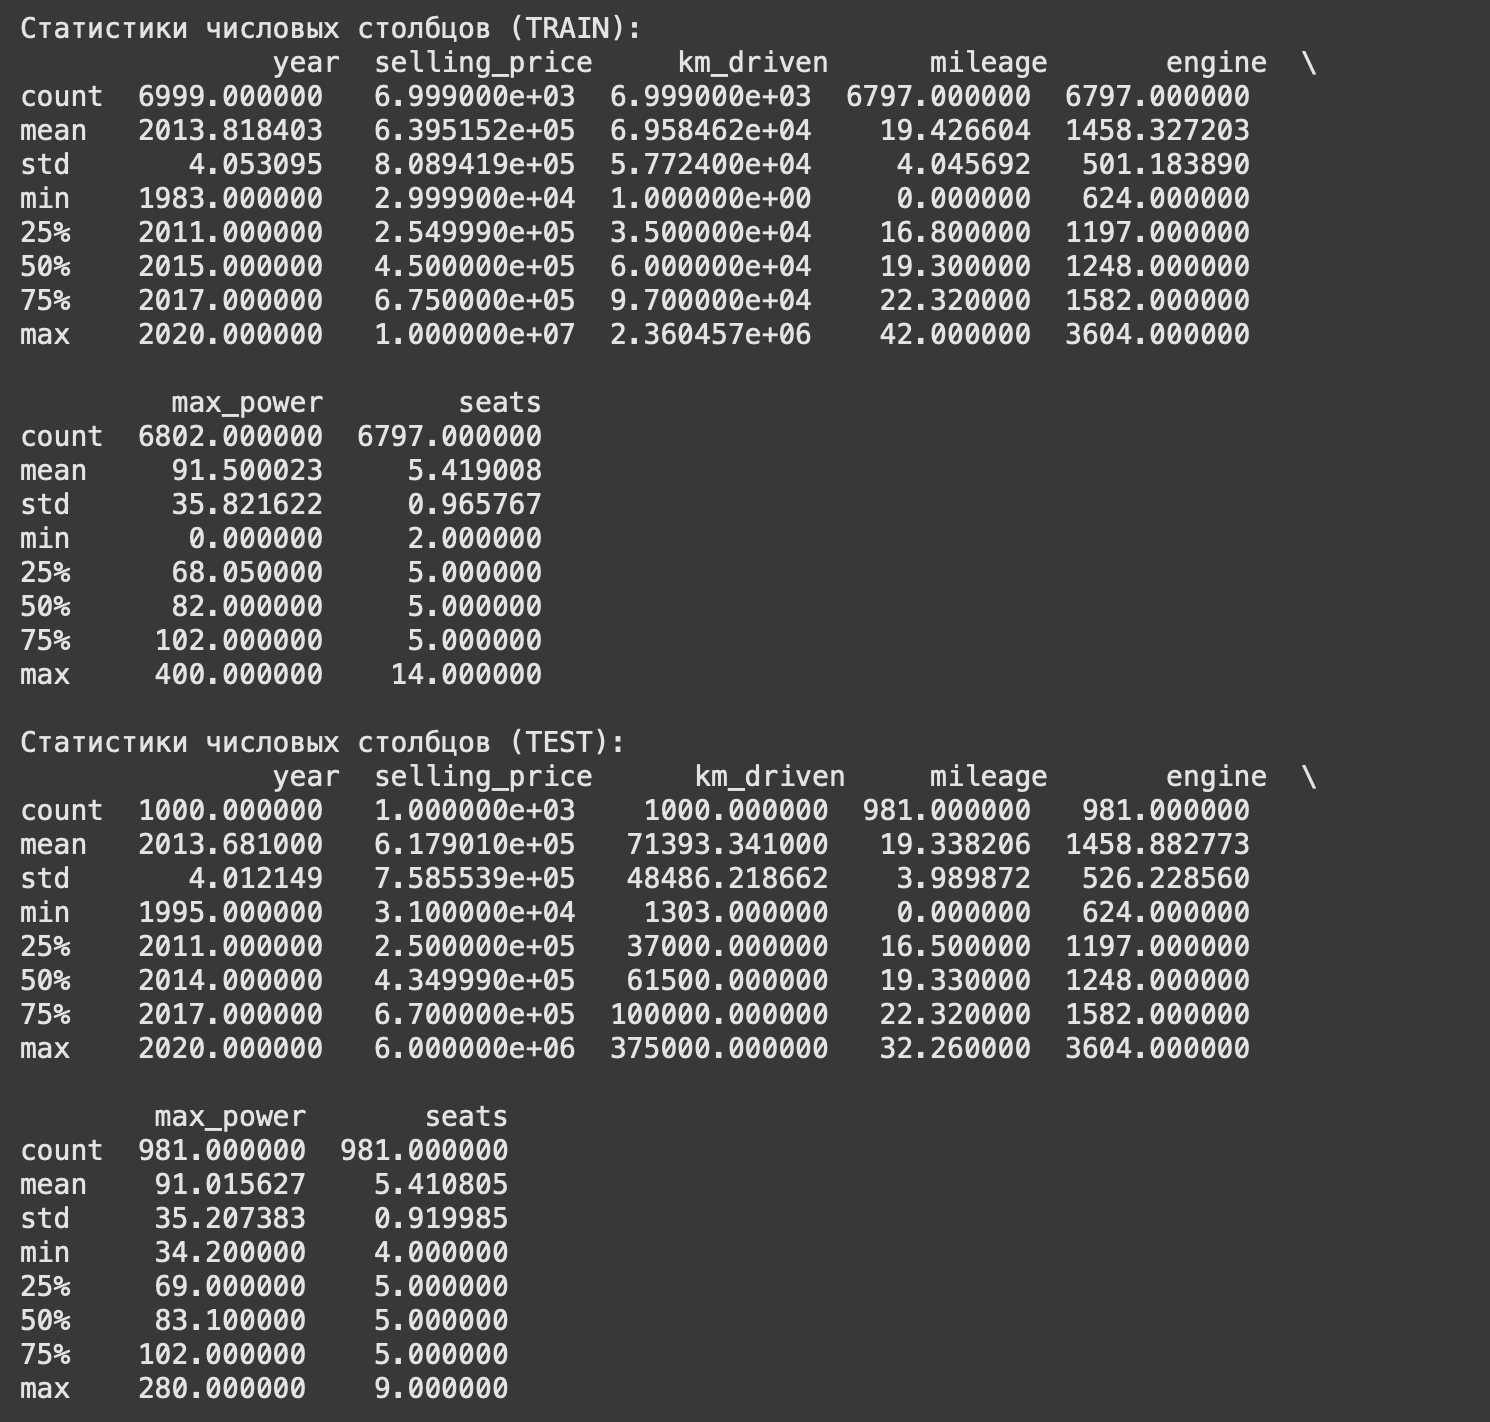

На основании этих двух анализов видем что заполнение пропусков свдинуло наши распределения

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

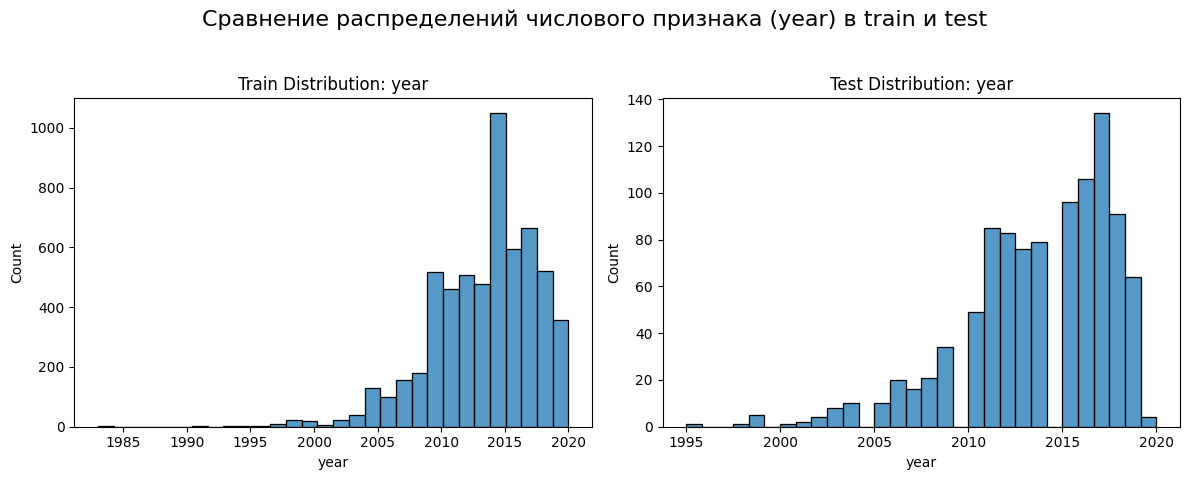

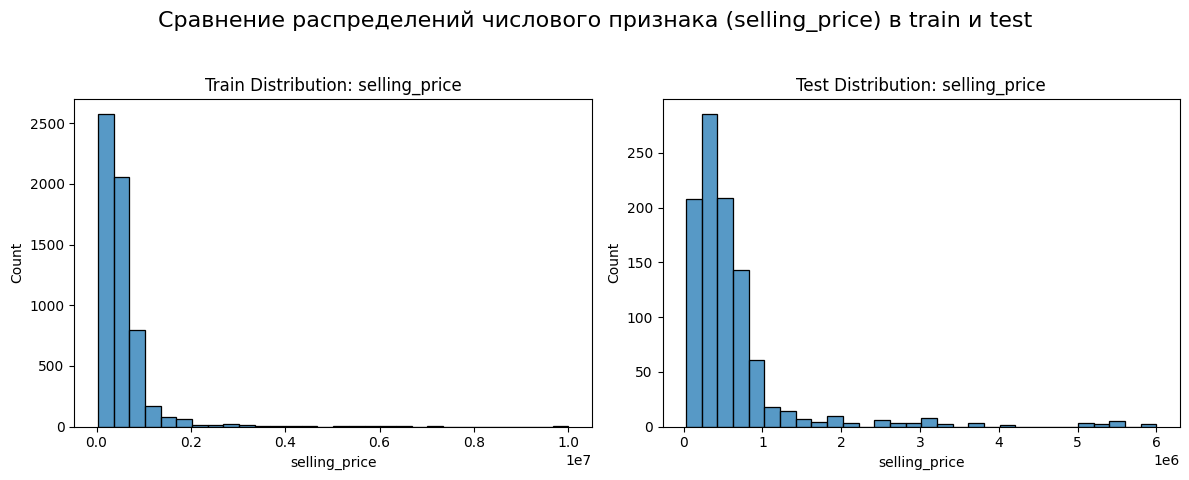

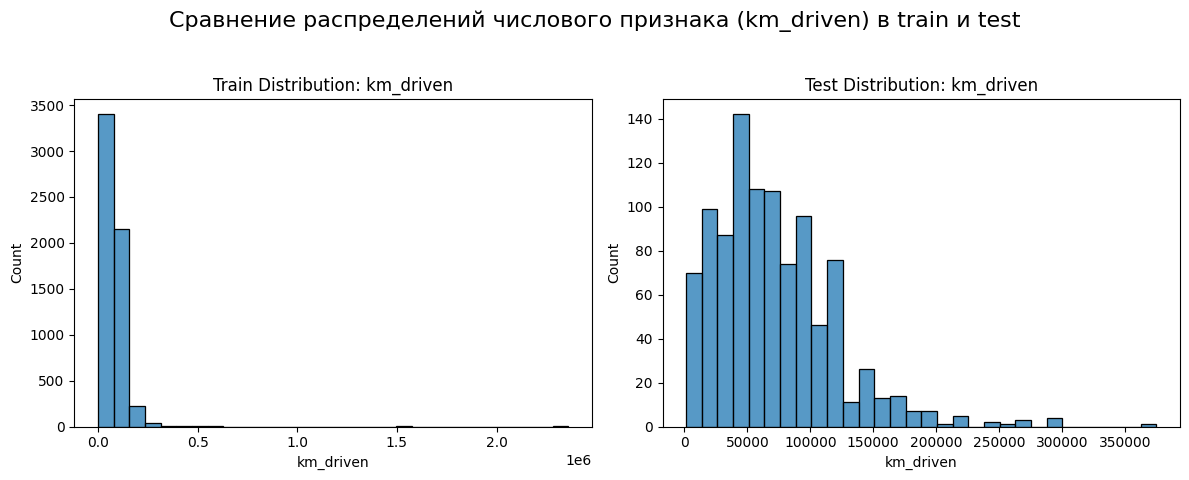

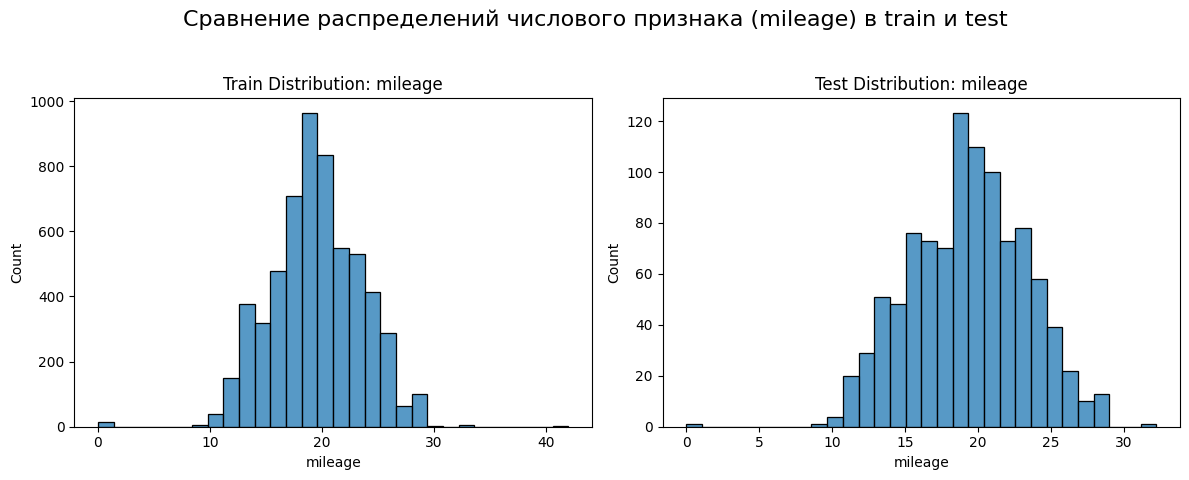

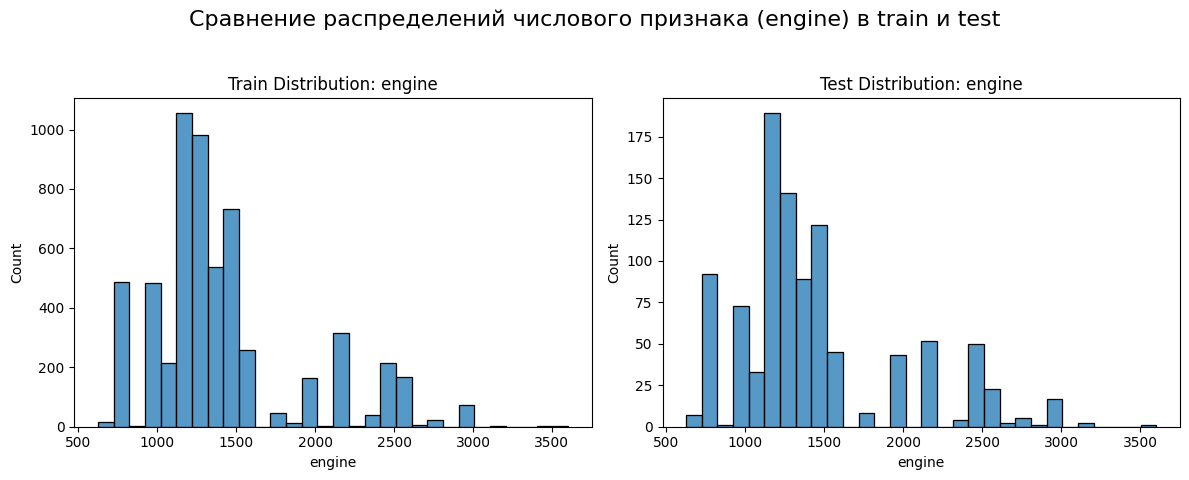

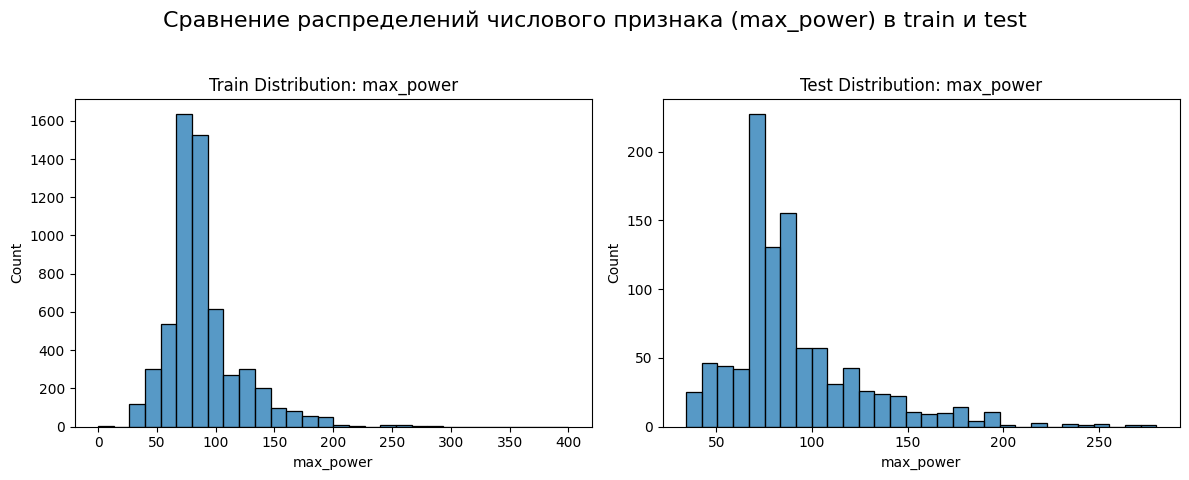

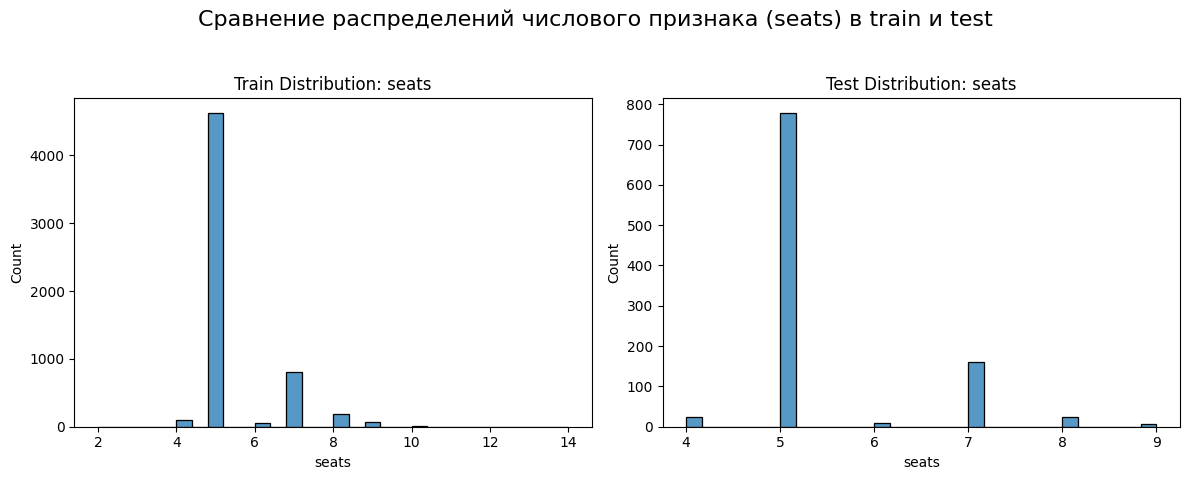

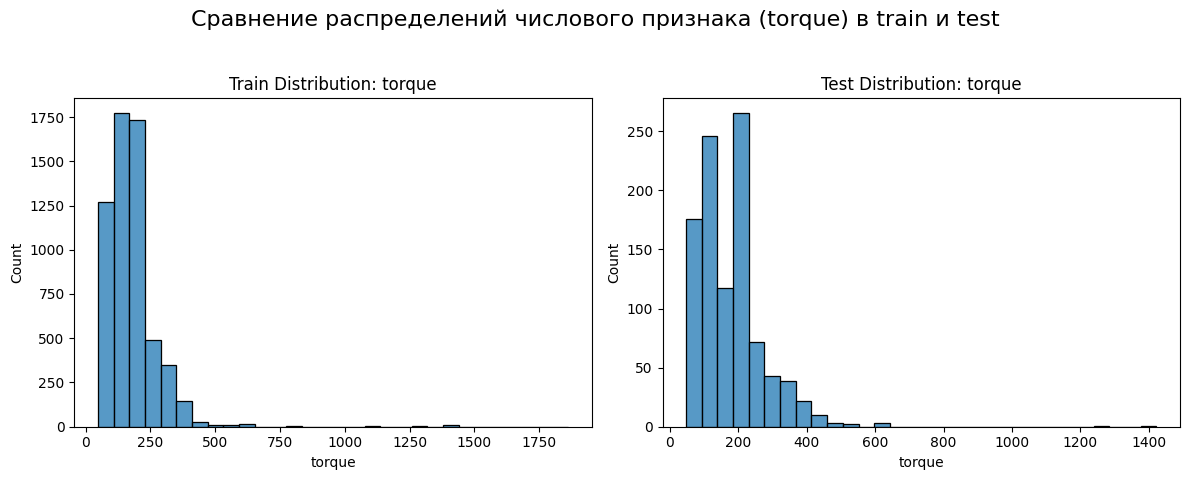

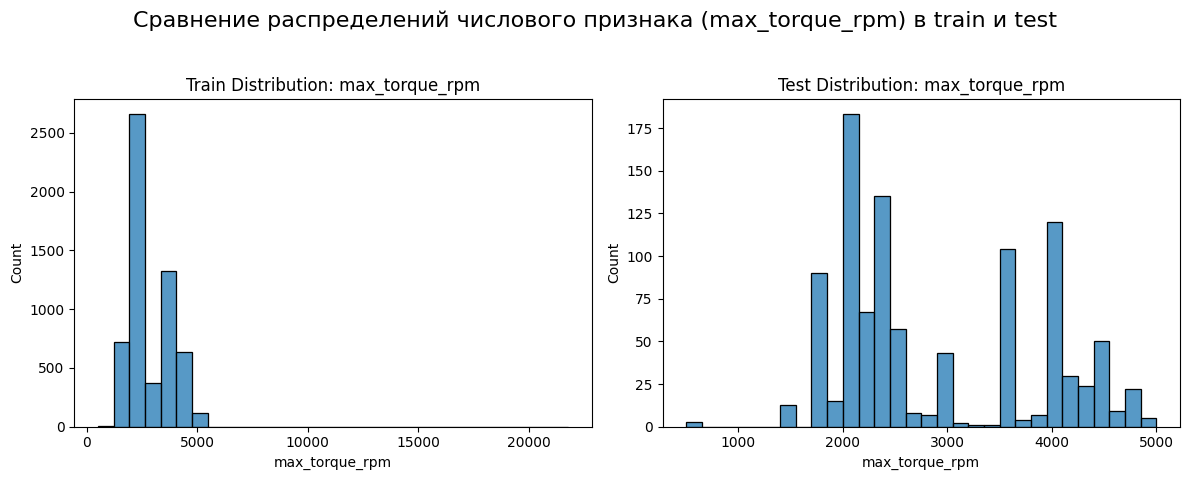

In [30]:
def compare_distributions(feature):
    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f'Сравнение распределений числового признака ({feature}) в train и test', fontsize=16)

    plt.subplot(1, 2, 1)
    sns.histplot(data=df_train, x=feature, bins=30)
    plt.title(f'Train Distribution: {feature}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df_test, x=feature, bins=30)
    plt.title(f'Test Distribution: {feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

numeric_features = ['year','selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']
for feature in numeric_features:
  compare_distributions(feature)

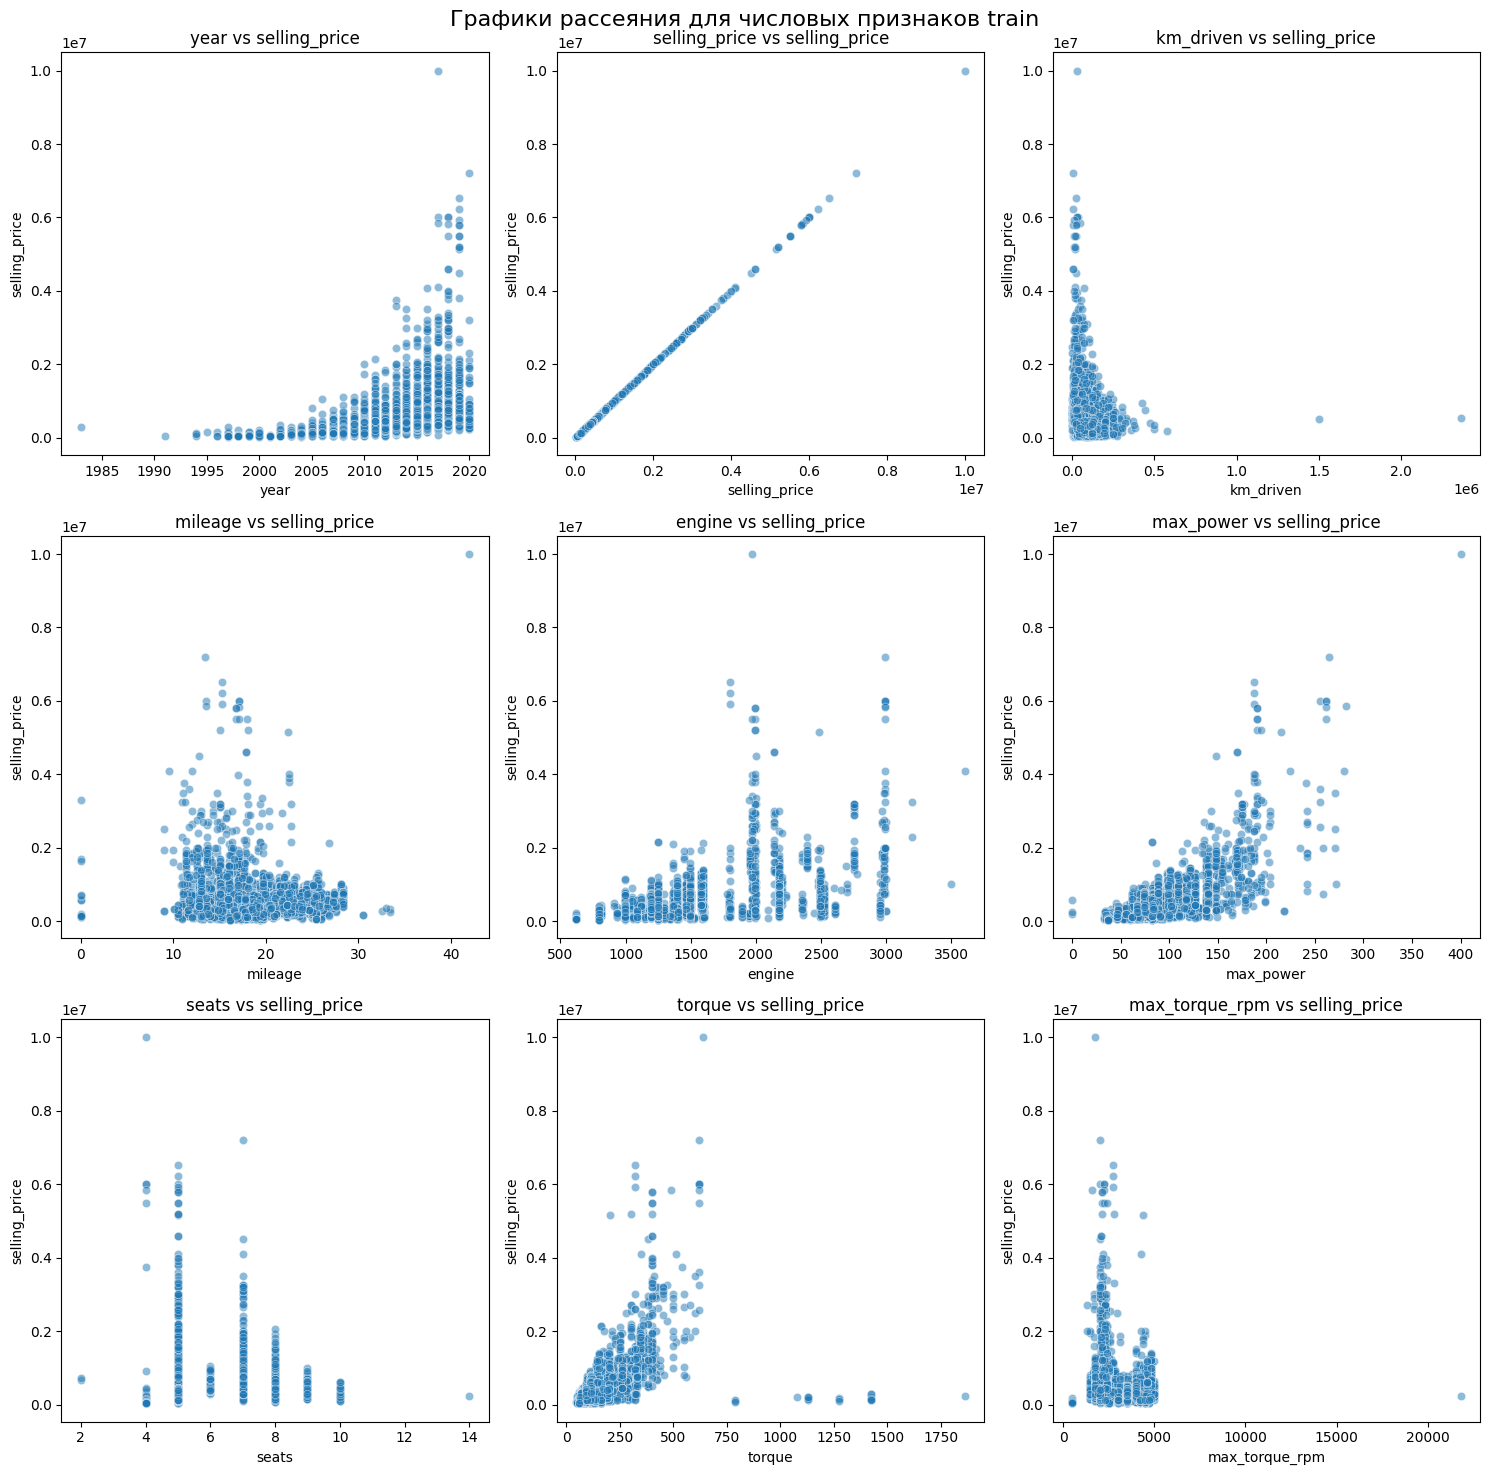

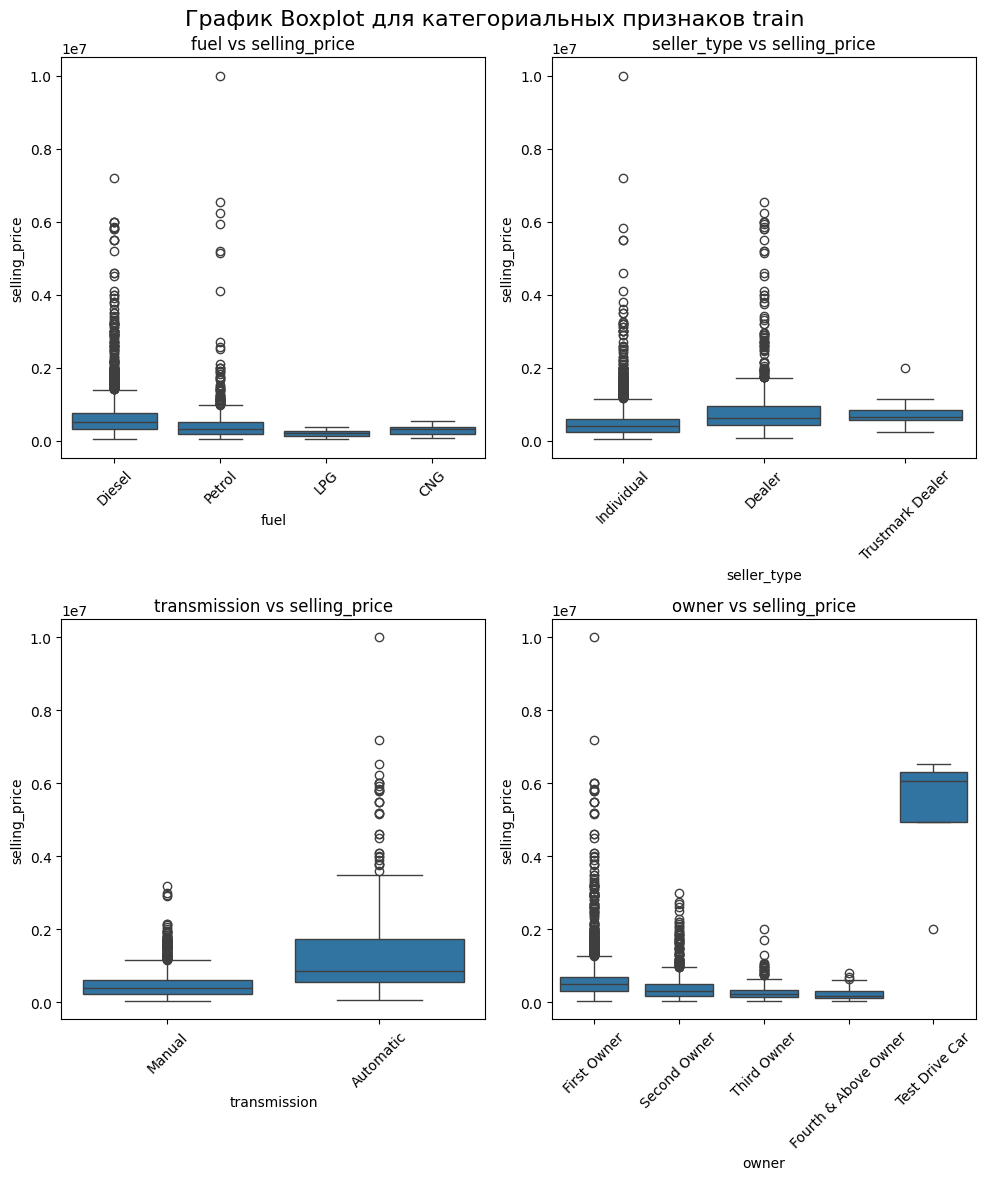

In [31]:
plt.figure(figsize=(15, 15))
plt.suptitle('Графики рассеяния для числовых признаков train', fontsize=16)
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_train, x=feature, y='selling_price', alpha=0.5)
    plt.title(f'{feature} vs selling_price')
plt.tight_layout()
plt.show()


categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(10, 12))
plt.suptitle('График Boxplot для категориальных признаков train', fontsize=16)
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_train, x=feature, y='selling_price')
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs selling_price')
plt.tight_layout()
plt.show()

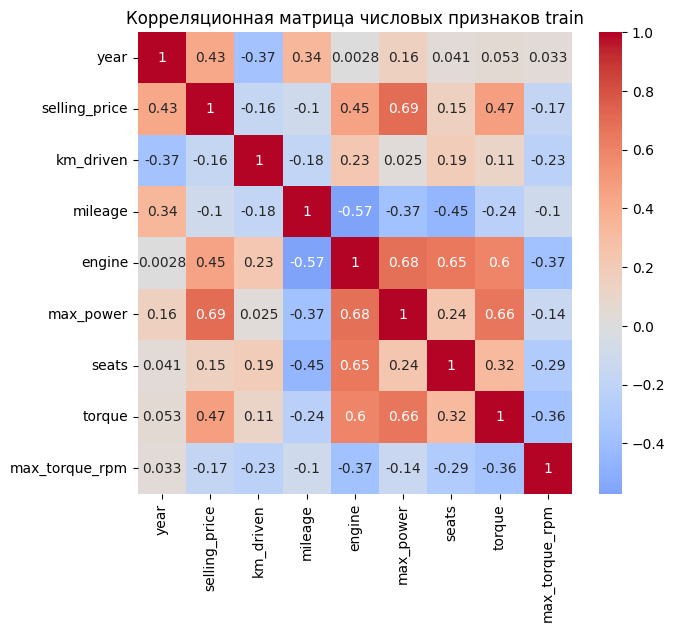

In [32]:
plt.figure(figsize=(7, 6))
sns.heatmap(df_train[numeric_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков train')
plt.show()

Сильная положительная корреляция (> 0.6):
*  max_power (0.69) - самая сильная корреляция с ценой

Умеренная положительная корреляция (0.3-0.6):
*  year (0.43)
*  engine (0.45)
*  torque (0.47)

Слабая корреляция (< 0.3):
*  seats (0.15)
*  km_driven (-0.16) - отрицательная корреляция
*  mileage (-0.1) - отрицательная корреляция
*  max_torque_rpm (-0.17) - отрицательная корреляция

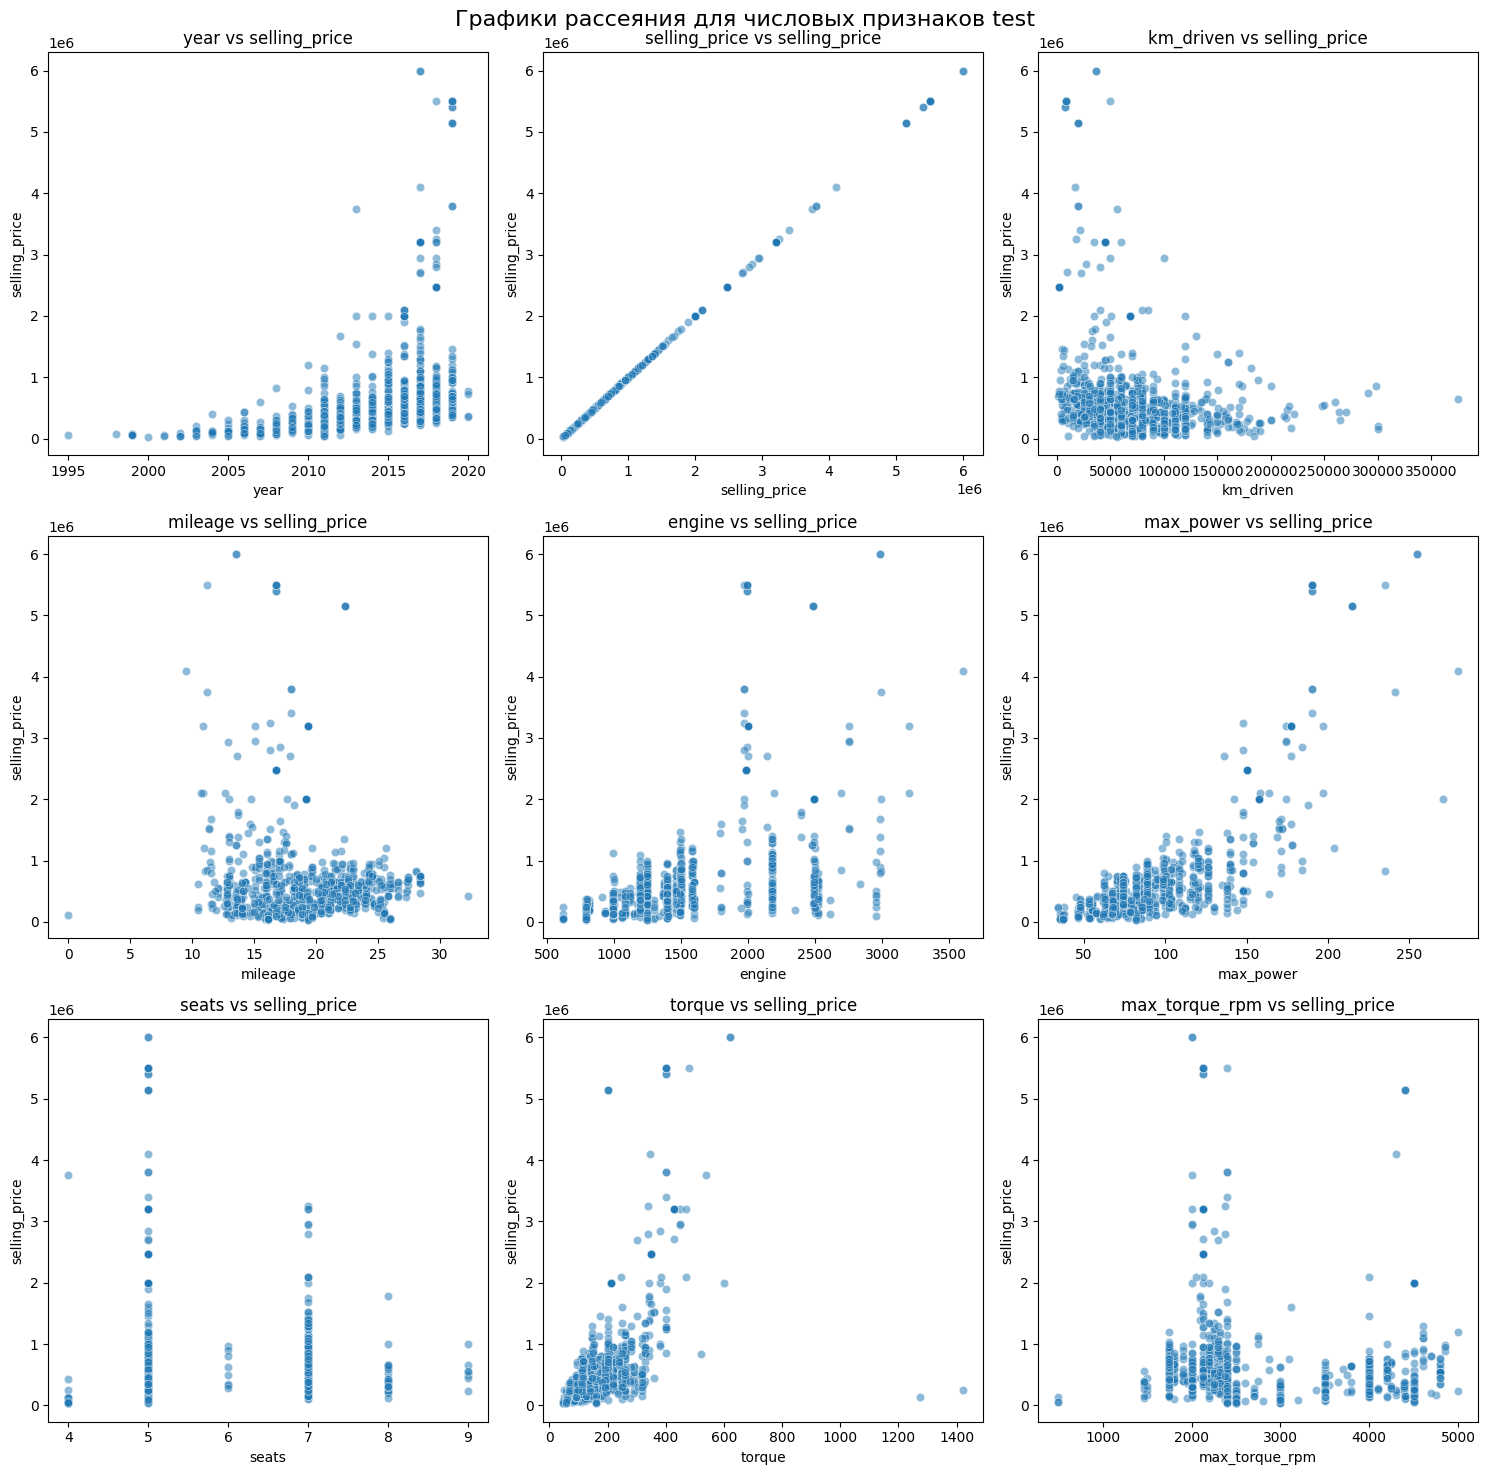

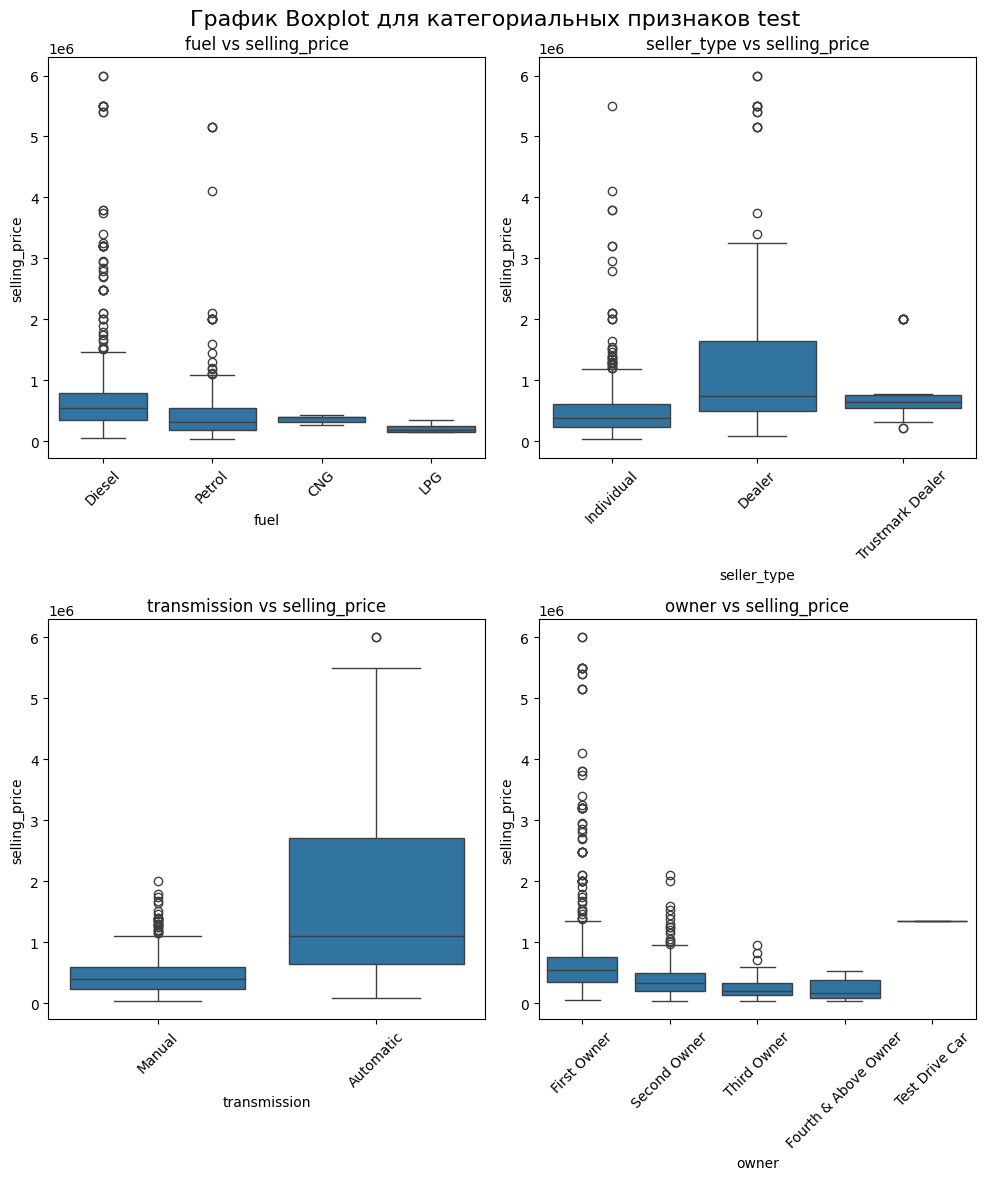

In [33]:
plt.figure(figsize=(15, 15))
plt.suptitle('Графики рассеяния для числовых признаков test', fontsize=16)
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_test, x=feature, y='selling_price', alpha=0.5)
    plt.title(f'{feature} vs selling_price')
plt.tight_layout()
plt.show()

# Boxplot для категориальных признаков остается без изменений
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(10, 12))
plt.suptitle('График Boxplot для категориальных признаков test', fontsize=16)
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_test, x=feature, y='selling_price')
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs selling_price')
plt.tight_layout()
plt.show()

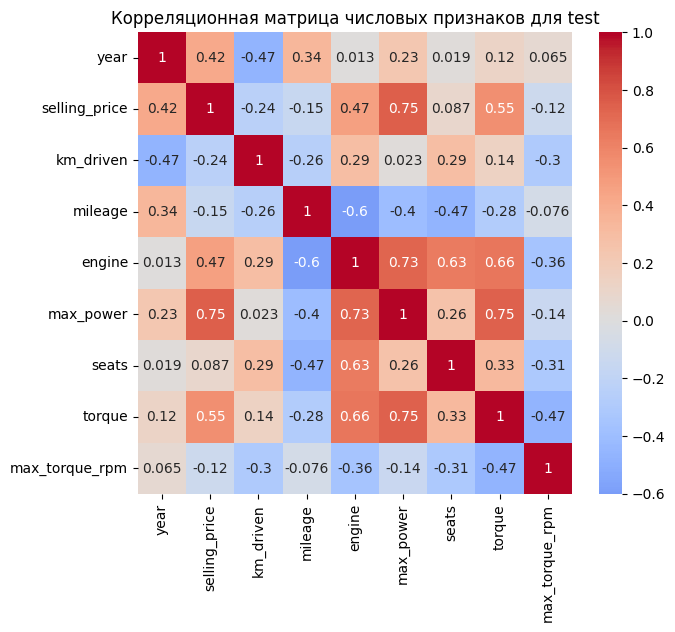

In [34]:
plt.figure(figsize=(7, 6))
sns.heatmap(df_test[numeric_features].corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('Корреляционная матрица числовых признаков для test')
plt.show()

Сильная положительная корреляция (> 0.6):
*  max_power (0.75) - ещё более сильная корреляция чем в train

Умеренная положительная корреляция (0.3-0.6):
*  year (0.42)
*  engine (0.47)
*  torque (0.55)

Слабая корреляция (< 0.3):
*  seats (0.087)
*  km_driven (-0.24) - отрицательная корреляция
*  mileage (-0.15) - отрицательная корреляция
*  max_torque_rpm (-0.12) - отрицательная корреляция

Таким образом, корреляционные паттерны схожи между train и test, что хорошо для обучения модели

Наиболее важные предикторы цены - мощность двигателя (max_power), год выпуска (year), объем двигателя (engine), крутящий момент (torque).

Отрицательные корреляции также логичны - чем больше пробег (km_driven), тем ниже цена и соотвественно чем выше расход топлива (mileage), тоже цена ниже.

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1500x1500 with 0 Axes>

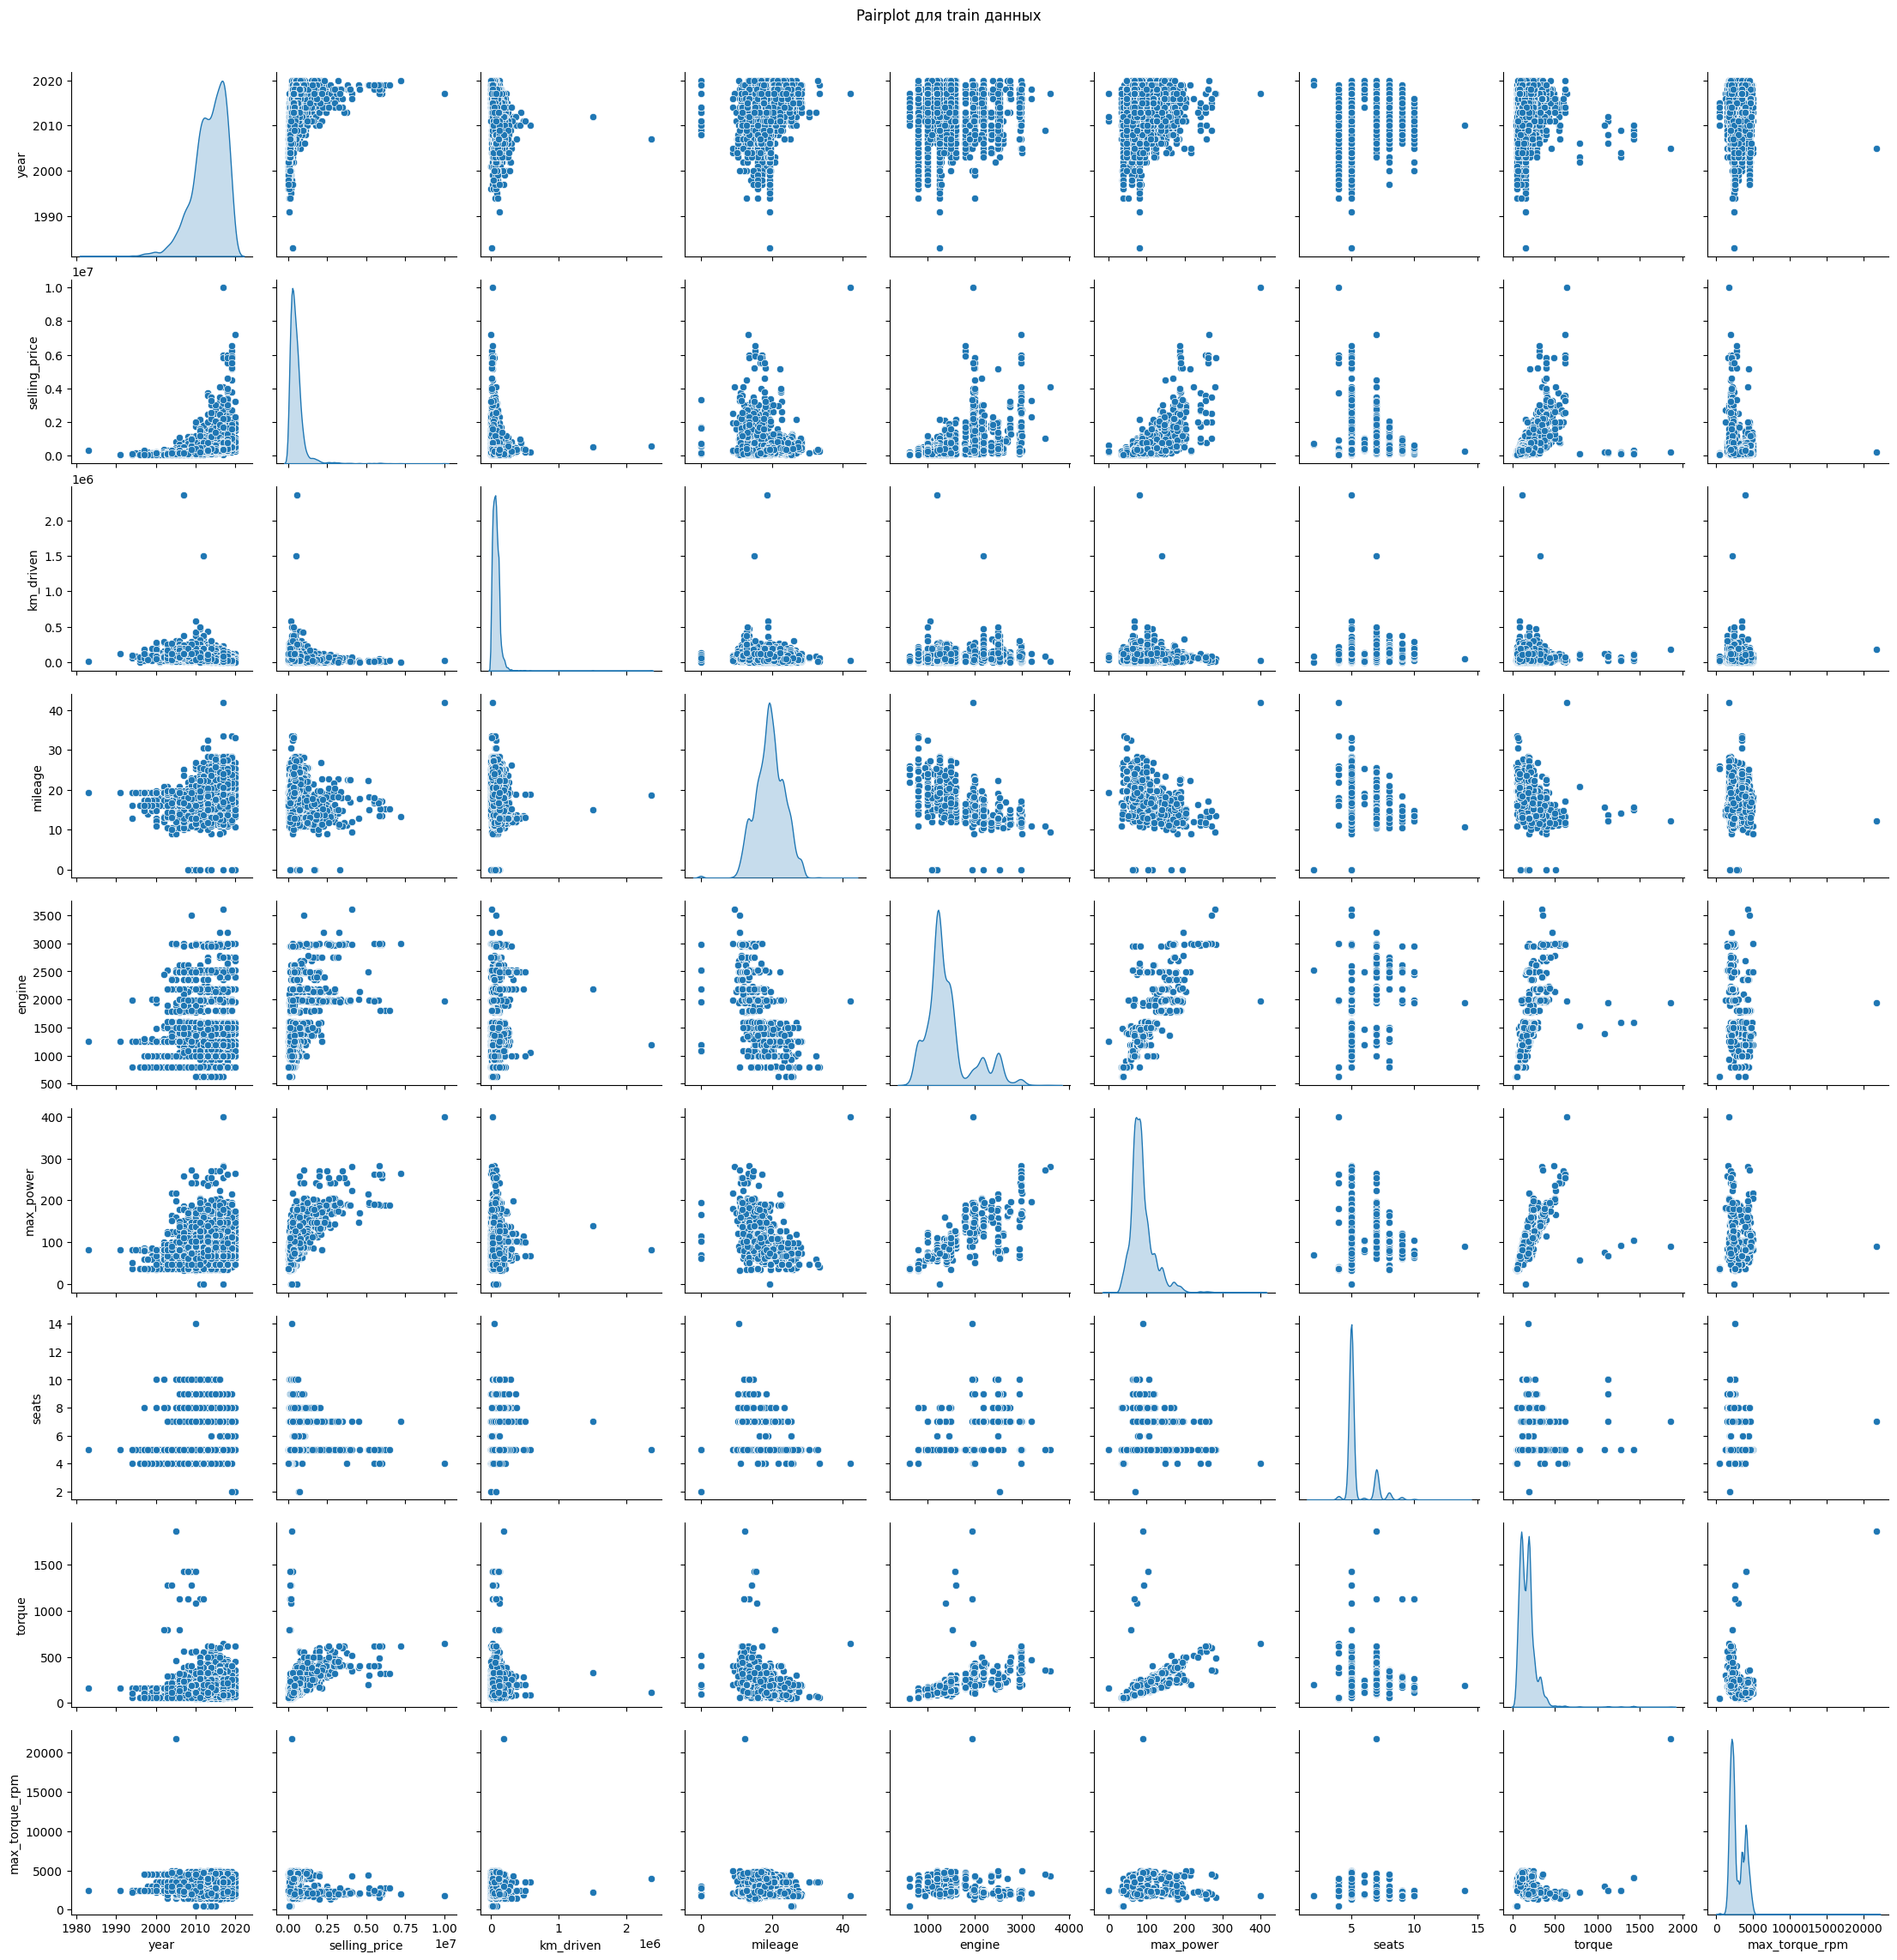

In [35]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_train[numeric_features], diag_kind='kde')
plt.suptitle('Pairplot для train данных', y=1.02)
plt.show()

Визуальный анализ по данным графикам дает только предварительные предположения о связях, и для точной оценки нужно лучше использовать статистические методы (например корреляционный анализ).

Выводы, которые можно сделать о связи признаков с целевой переменной (selling_price) на основе pairplot:
1. year:
   *  Можно предположить положительную нелинейную связь
   *  Более новые автомобили имеют более высокую цену
   *  Заметен резкий рост цен для самых новых моделей

2. km_driven:
   *  Отрицательная связь
   *  Автомобили с большим пробегом стоят дешевле
   *  Связь похожа на экспоненциальное убывание

3. mileage:
   *  Слабая отрицательная связь
   *  Большой разброс значений

4. engine:
   *  Положительная связь
   *  Автомобили с большим объемом двигателя дороже
   *  Заметна нелинейность связи

5. max_power:
   *  Сильная положительная связь
   *  Почти линейная зависимость
   *  Наиболее выраженная связь среди всех признаков

6. seats:
   *  Слабая связь
   *  Дискретные значения
   *  Заметен больший разброс цен для определенного количества мест

7. torque:
   *  Заметна положительная связь
   *  Разброс цен увеличивается с ростом крутящего момента
   *  Нелинейный характер зависимости

8. max_torque_rpm:
   *  Слабая отрицательная связь
   *  Большой разброс значений
   *  Нет явной линейной зависимости

Для лучшего и более точного анализа корреляций лучше использовать корреляционную матрицу или как вариант построить графики с добавлением линии тренда или же графики с прозрачностью точек для лучшей видимости плотности.

<Figure size 1500x1500 with 0 Axes>

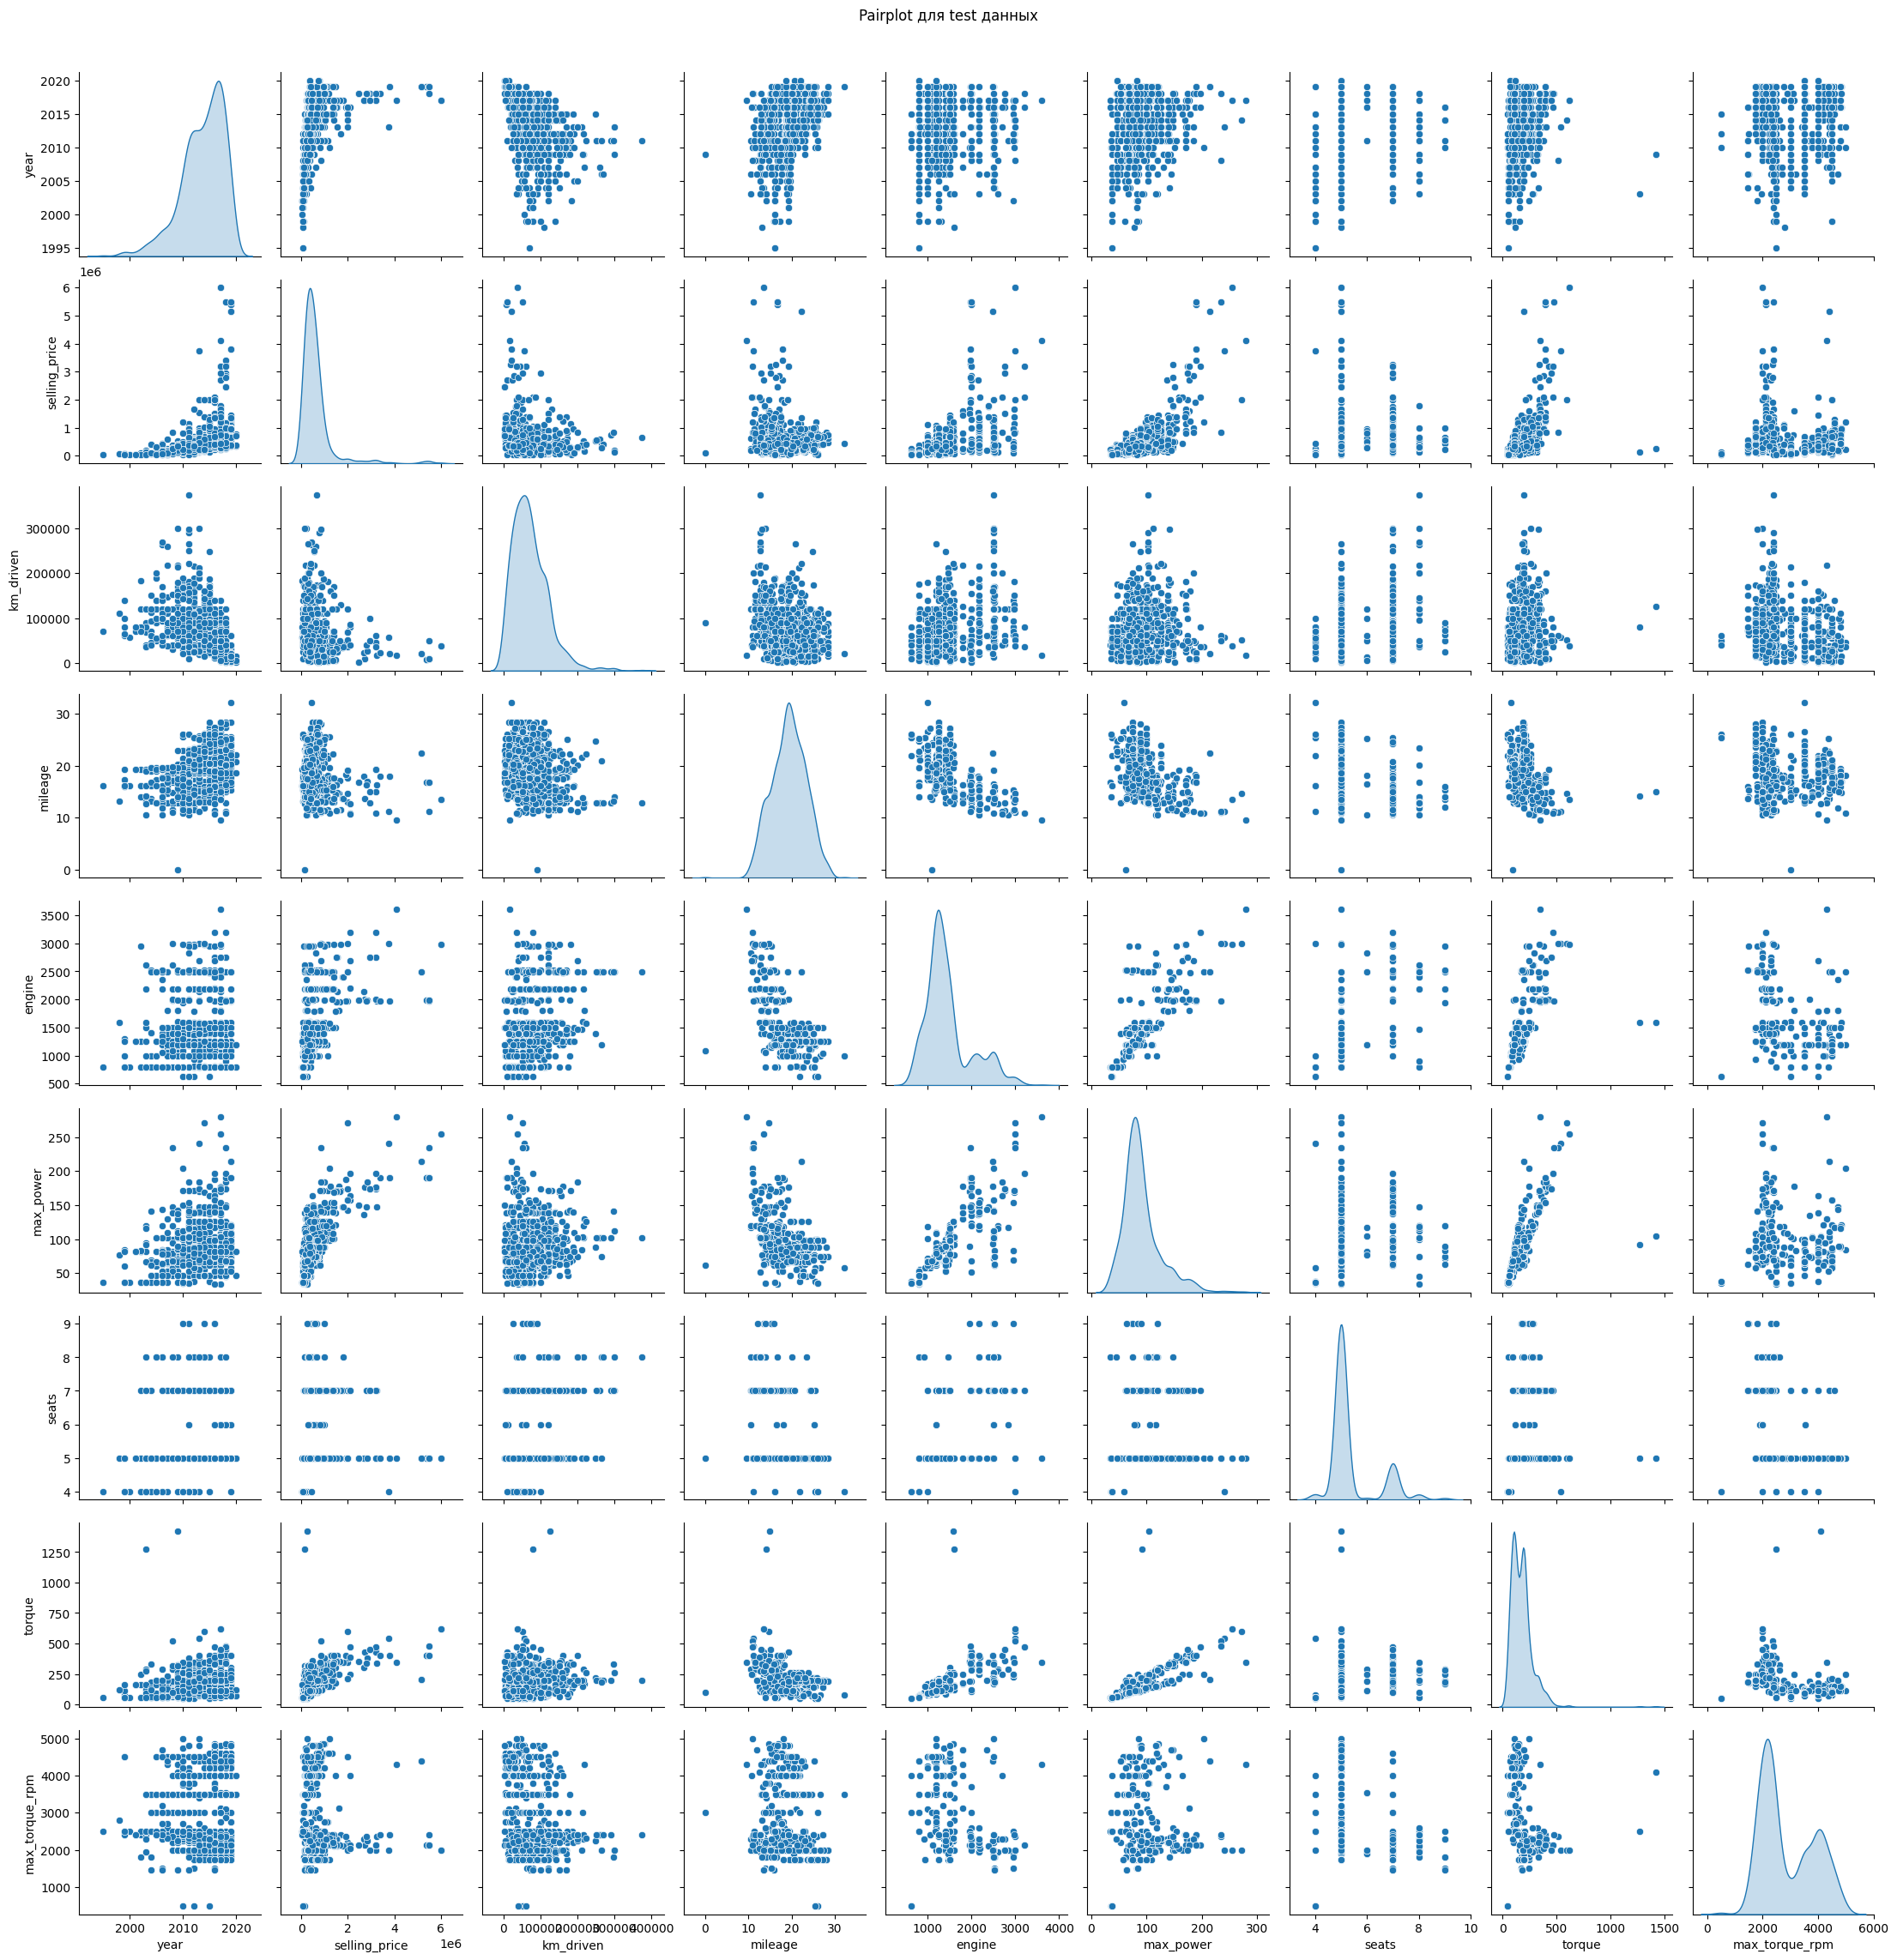

In [36]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_test[numeric_features], diag_kind='kde')
plt.suptitle('Pairplot для test данных', y=1.02)
plt.show()

Визувльный вывод о связи признаков с целевой переменной (selling_price) для test:

1. year:
   * Видна тенденция - более новые автомобили имеют больше точек в верхней части графика (более высокую цену)
   * Можно предположить положительную связь: чем новее автомобиль, тем выше цена

2. km_driven:
   * Точки концентрируются в нижней части при увеличении пробега
   * Предполагается отрицательная связь: чем больше пробег, тем ниже цена

3. mileage:
   * Сложно увидеть явную зависимость
   * Точки распределены довольно равномерно
   * Связь, если есть, то очень слабая

4. engine:
   * При увеличении объема двигателя есть тенденция к росту цены
   * Можно предположить положительную связь

5. max_power:
   * Заметна тенденция - с ростом мощности растут и цены
   * Положительная связь

6. seats:
   * Из-за дискретности признака сложно увидеть явную зависимость
   * Разные значения seats имеют разный разброс цен
   * Четкой связи не прослеживается

7. torque:
   *  Умеренная положительная связь с ценой
   *  Точки формируют восходящий паттерн
   *  Заметен разброс цен, особенно в средних значениях крутящего момента
   *  Нелинейный характер зависимости

8. max_torque_rpm:
   *  Слабая отрицательная связь с ценой
   *  Большой разброс значений
   *  Видны две основные группы значений (около 2000 и 4000 rpm)
   *  Более дорогие автомобили чаще имеют меньшие значения max_torque_rpm

Сравнивая pairplot для тестовых данных и для тренировочных, могу сделать следующие выводы:

1. Распределения признаков очень похожи (диапазоны значений совпадают, форма распределений (графики по диагонали) аналогична, плотность точек визуально схожа)

2. Особенности данных сохраняются - дискретность в признаке seats (4, 5, 6, 7, 8, 9 мест), концентрация значений year в более современном периоде, схожий характер разброса точек в парах признаков

Также важные наблюдения, которые я заметил что тестовая выборка хорошо представляет те же паттерны, что и тренировочная. Нет явных различий в распределениях, которые могли бы вызвать проблемы при применении модели. Сохраняется характер взаимосвязей между признаками, это говорит о качественном разделении данных на train и test наборы, что важно для корректной оценки модели на тестовых данных.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

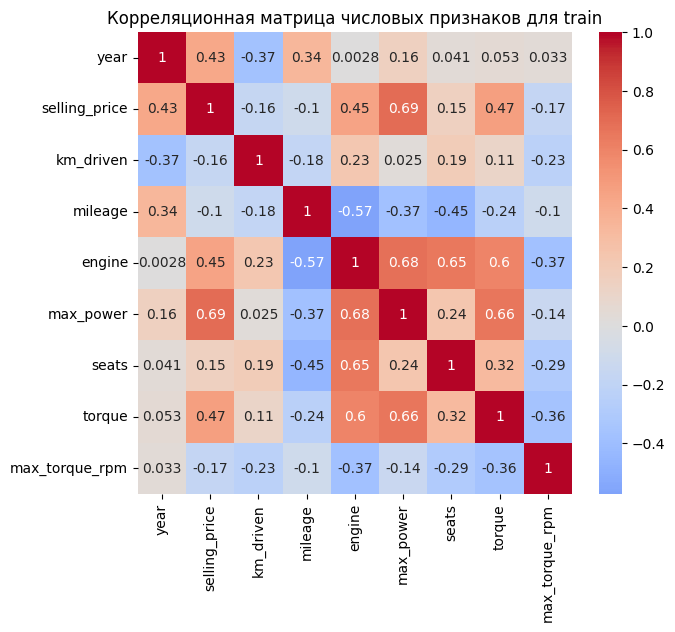


Корреляции с целевой переменной (selling_price):


NameError: name 'correlation_matrix' is not defined

In [37]:
plt.figure(figsize=(7, 6))
sns.heatmap(df_train[numeric_features].corr(), annot=True, cmap='coolwarm', center=0)

plt.title('Корреляционная матрица числовых признаков для train')
plt.show()

print("\nКорреляции с целевой переменной (selling_price):")
print(correlation_matrix['selling_price'].sort_values(ascending=False))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Наименее скоррелированные признаки: year и engine (0.0028) - практически нулевая корреляция, km_driven и max_power (0.025) и year и max_torque_rpm (0.033) - очень слабая корреляция

2. Сильные положительные линейные корреляции: max_power и selling_price (0.69), max_power и engine (0.68), engine и seats (0.65), max_power и torque (0.66), engine и torque (0.60)

3. Да, утверждение считаю верным. Между годом выпуска (year) и пробегом (km_driven) наблюдается отрицательная корреляция (-0.37). Это логично: чем старше автомобиль (меньше значение year), тем больше вероятность, что он накопил больший пробег (большее значение) к моменту продажи. Корреляция умеренная, но достаточная, чтобы подтвердить это утверждение.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [38]:
import numpy as np

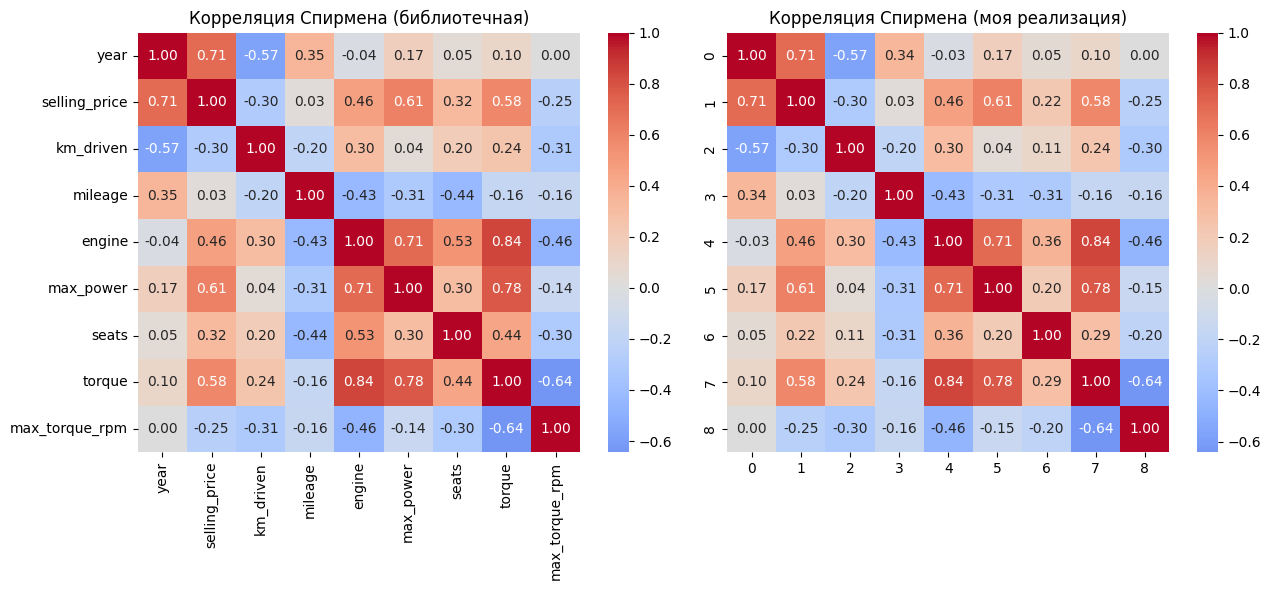

In [39]:
def spearman_corr(x, y):
    x_ranks = np.argsort(np.argsort(x))
    y_ranks = np.argsort(np.argsort(y))

    d = x_ranks - y_ranks

    n = len(x)
    rho = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))

    return rho

n = len(numeric_features)
custom_spearman = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x = df_train[numeric_features[i]].values
        y = df_train[numeric_features[j]].values
        custom_spearman[i,j] = spearman_corr(x, y)


library_spearman = df_train[numeric_features].corr(method='spearman')


fig, axes = plt.subplots(1, 2, figsize=(13, 6))


sns.heatmap(library_spearman, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Корреляция Спирмена (библиотечная)')

sns.heatmap(custom_spearman, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Корреляция Спирмена (моя реализация)')

plt.tight_layout()
plt.show()

Сравнивая библиотечную и свою, то вижу что большинство значений совпадают с высокой точностью (но и встречаются небольшие расхождения), основные сильные корреляции сохраняются в обеих реализациях, знаки корреляций (полож/отриц) совпадают.

Моя реализация корреляции Спирмена в целом корректно отражает основные зависимости в данных, хоть и есть небольшие расхождения с библиотечной версией, возможно, из-за различий в обработке ties (одинаковых значений) в рангах.

In [40]:
import phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']


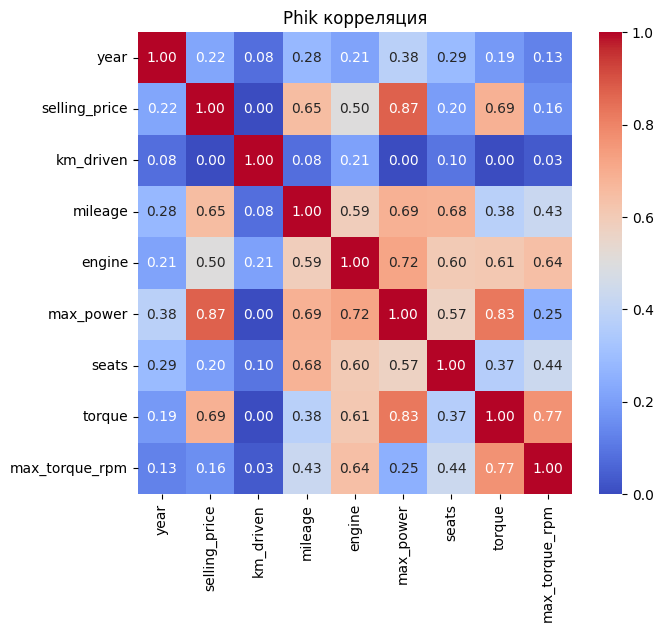

In [41]:
phik_matrix = df_train[numeric_features].phik_matrix()

plt.figure(figsize=(7, 6))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Phik корреляция')
plt.show()

1. Основные отличия от других корреляций:
* Некоторые связи стали сильнее (например, mileage и selling_price)
* Другие связи ослабли (например, year и selling_price)
* km_driven показывает минимальные корреляции со всеми признаками

Вижу, что Phik обнаруживает более сильные нелинейные зависимости. Некоторые связи, которые казались слабыми в других методах, здесь проявлись сильнее.
Метод лучше работает с категориальными переменными (например, seats).
Результат показывает, что в данных присутствуют сложные нелинейные зависимости, которые не были очевидны при использовании традиционных методов корреляции.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

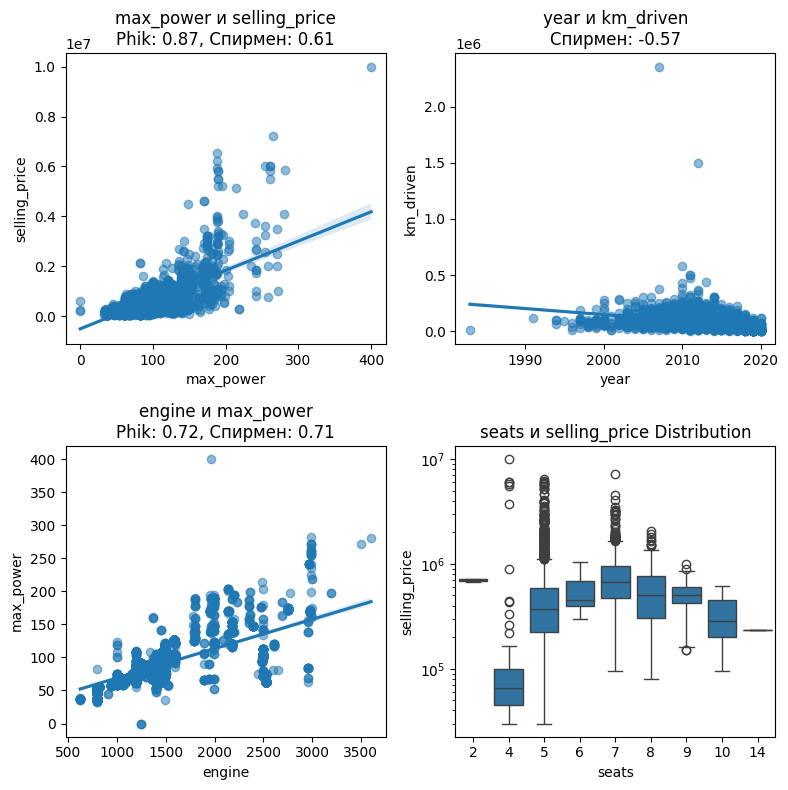

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.regplot(data=df_train, x='max_power', y='selling_price', scatter_kws={'alpha':0.5}, ax=axes[0,0])
axes[0,0].set_title('max_power и selling_price\nPhik: 0.87, Спирмен: 0.61')

sns.regplot(data=df_train, x='year', y='km_driven', scatter_kws={'alpha':0.5}, ax=axes[0,1])
axes[0,1].set_title('year и km_driven\nСпирмен: -0.57')

sns.regplot(data=df_train, x='engine', y='max_power', scatter_kws={'alpha':0.5}, ax=axes[1,0])
axes[1,0].set_title('engine и max_power\nPhik: 0.72, Спирмен: 0.71')

sns.boxplot(data=df_train, x='seats', y='selling_price', ax=axes[1,1])
axes[1,1].set_title('seats и selling_price Distribution')
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

Эти графики важны по моему мнению потому что:

1. max_power и selling_price:
   * Показывает самую сильную зависимость по phik корреляции
   * Видна нелинейная природа связи
   * Объясняет различия между разными типами корреляций

2. year и km_driven:
   * Линия тренда показывает общую тенденцию снижения, что демонстрирует логичную обратную зависимость
   * Помогает понять, почему Спирмен показывает более сильную корреляцию, чем Пирсон
   * Важно для понимания состояния автомобиля

3. engine и max_power:
   * Показывает техническую зависимость между характеристиками двигателя
   * Может указывать на мультиколлинеарность, которую нужно учесть при моделировании
   * Высокая корреляция во всех методах

4. seats и selling_price (boxplot):
   * Показывает распределение цен для разного количества мест (логарифмическая шкала для цены)
   * Демонстрирует, почему phik корреляция может быть более информативной для категориальных переменных
   * Помогает увидеть выбросы и разброс цен в разных категориях (наибольший разброс цен для 5-7 местных автомобилей, медианная цена выше для автомобилей с 6-7 местами, много выбросов в верхней части для всех категорий,  2-4 местные автомобили имеют меньший разброс цен)


Эти визуализации помогают:
* Понять зависимость (линейные/нелинейные), показан тренд
* Объяснить различия между разными типами корреляций
* Выявить потенциальные проблемы для моделирования (выбросы, мультиколлинеарность)

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [44]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]
X_train.shape

(5840, 6)

In [45]:
assert X_train.shape == (5840, 6)

In [46]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [47]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print('Метрики для тренировочного набора:')
print(f'R² = {r2_train:.4f}')
print(f'MSE = {mse_train:.4f}')
print('\nМетрики для тестового набора:')
print(f'R² = {r2_test:.4f}')
print(f'MSE = {mse_test:.4f}')

Метрики для тренировочного набора:
R² = 0.5923
MSE = 116874153930.0285

Метрики для тестового набора:
R² = 0.5941
MSE = 233298779730.4549


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [49]:
def r2_score_manual(y_true, y_pred):

    y_mean = y_true.mean()

    numerator = np.sum((y_true - y_pred) ** 2)

    denominator = np.sum((y_true - y_mean) ** 2)

    r2 = 1 - (numerator / denominator)

    return r2

r2_manual_train = r2_score_manual(y_train, y_train_pred)
r2_manual_test = r2_score_manual(y_test, y_test_pred)

print(f'R² (ручной расчет) для тренировочного набора: {r2_manual_train:.4f}')
print(f'R² (ручной расчет) для тестового набора: {r2_manual_test:.4f}')

R² (ручной расчет) для тренировочного набора: 0.5923
R² (ручной расчет) для тестового набора: 0.5941


$R² = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$

где:
- $y_i$ - фактические значения
- $\hat{y}_i$ - предсказанные значения
- $\bar{y}$ - среднее фактических значений

Числитель - сумма квадратов остатков (SSres)
Знаменатель - полная сумма квадратов (SStot)

R² показывает долю дисперсии целевой переменной, объясненную моделью.
Значения: от -∞ до 1, где 1 - идеальная модель.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [50]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score_manual(y_true, y_pred)

    n = len(y_true)

    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

    return adjusted_r2

adj_r2_train = adjusted_r2_score(y_train, y_train_pred, X_train.shape[1])
adj_r2_test = adjusted_r2_score(y_test, y_test_pred, X_test.shape[1])

print(f'Adjusted R² для тренировочного набора: {adj_r2_train:.4f}')
print(f'Adjusted R² для тестового набора: {adj_r2_test:.4f}')

Adjusted R² для тренировочного набора: 0.5918
Adjusted R² для тестового набора: 0.5917


$$Adjusted R² = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

где:
- n - количество наблюдений
- p - количество предикторов
- R² - обычный коэффициент детерминации

Adjusted R² применяется когда:
1. Много предикторов относительно размера выборки
2. Нужно сравнить модели с разным числом признаков
3. Требуется учесть сложность модели

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

Xtest_std = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

model = LinearRegression()

model.fit(Xtrain_std, y_train)

y_pred_train = model.predict(Xtrain_std)

y_pred_test = model.predict(Xtest_std)


print(f'R2 Train: {r2_score(y_train, y_pred_train)}')

print(f'MSE Train: {MSE(y_train, y_pred_train)}')

print(f'R2 Test: {r2_score(y_test, y_pred_test)}')

print(f'MSE Test: {MSE(y_test, y_pred_test)}')

R2 Train: 0.5922591702157303
MSE Train: 116874153930.02892
R2 Test: 0.594141979478852
MSE Test: 233298779730.44965


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [52]:
pd.DataFrame(data=np.array([model.coef_]), columns=X_train.columns)

year    km_driven       mileage        engine      max_power  \
0  152772.570846 -44158.81852  28833.925778  61178.494337  322807.353259   

          seats  
0 -23209.132486

In [53]:
coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': np.abs(model.coef_)
})

coef_sorted = coef.sort_values('coefficient', ascending=False)

print("Важность признаков (по модулю коэффициентов):")
print(coef_sorted)

most_important = coef_sorted.iloc[0]
print(f"\nНаиболее информативный признак: {most_important['feature']}")
print(f"Значение коэффициента: {most_important['coefficient']:.4f}")

Важность признаков (по модулю коэффициентов):
     feature    coefficient
4  max_power  322807.353259
0       year  152772.570846
3     engine   61178.494337
1  km_driven   44158.818520
2    mileage   28833.925778
5      seats   23209.132486

Наиболее информативный признак: max_power
Значение коэффициента: 322807.3533


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print('Метрики для Lasso регрессии:')
print(f'R² train: {r2_train_lasso:.4f}, R² test: {r2_test_lasso:.4f}')

coef_lasso = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': np.abs(lasso.coef_)
}).sort_values('coefficient', ascending=False)

print('\nВажность признаков в Lasso регрессии:')
print(coef_lasso)


zero_coef = coef_lasso[coef_lasso['coefficient'] < 1]
print(f'\nКоличество занулённых признаков: {len(zero_coef)}')
if len(zero_coef) > 0:
    print('Занулённые признаки:', zero_coef['feature'].tolist())

Метрики для Lasso регрессии:
R² train: 0.5923, R² test: 0.5941

Важность признаков в Lasso регрессии:
     feature   coefficient
0       year  37304.486509
5      seats  23626.118729
4  max_power  10203.273883
2    mileage   7234.500801
3     engine    125.976014
1  km_driven      0.735175

Количество занулённых признаков: 1
Занулённые признаки: ['km_driven']


### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [65]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)


In [62]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'alpha': np.logspace(-50, 50, 100),
    'max_iter': [10000]
}

lasso_grid = GridSearchCV(
    estimator=Lasso(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

lasso_grid.fit(X_train_scaled, y_train)


print("Лучшие параметры:", lasso_grid.best_params_)
print("Лучший R² на кросс-валидации:", lasso_grid.best_score_)


best_lasso = lasso_grid.best_estimator_

coef_best_lasso = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
})

print("\nКоэффициенты лучшей модели:")
print(coef_best_lasso)

zero_coef = coef_best_lasso[coef_best_lasso['coefficient'] == 0]
print(f"\nКоличество занулённых признаков: {len(zero_coef)}")
if len(zero_coef) > 0:
    print("Занулённые признаки:", zero_coef['feature'].tolist())


n_models = len(param_grid['alpha']) * 10
print(f"\nВсего было обучено моделей: {n_models}")

Лучшие параметры: {'alpha': 35111.91734215142, 'max_iter': 10000}
Лучший R² на кросс-валидации: 0.574161564317856

Коэффициенты лучшей модели:
     feature    coefficient
0       year  141175.053557
1  km_driven   -8763.917631
2    mileage       0.000000
3     engine       0.000000
4  max_power  313882.098158
5      seats      -0.000000

Количество занулённых признаков: 3
Занулённые признаки: ['mileage', 'engine', 'seats']

Всего было обучено моделей: 1000


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-4, 1, 20),
    'l1_ratio': np.linspace(0.1, 0.9, 9),
    'max_iter': [10000]
}

elastic_grid = GridSearchCV(
    estimator=ElasticNet(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)


elastic_grid.fit(X_train_scaled, y_train)


print("Лучшие параметры:", elastic_grid.best_params_)
print("Лучший R² на кросс-валидации:", elastic_grid.best_score_)

n_models = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10
print(f"\nВсего было обучено моделей: {n_models}")
print(f"- {len(param_grid['alpha'])} значений alpha")
print(f"- {len(param_grid['l1_ratio'])} значений l1_ratio")
print(f"- 10 фолдов кросс-валидации")

Лучшие параметры: {'alpha': 0.4832930238571752, 'l1_ratio': 0.7000000000000001, 'max_iter': 10000}
Лучший R² на кросс-валидации: 0.5767736588683914

Всего было обучено моделей: 1800
- 20 значений alpha
- 9 значений l1_ratio
- 10 фолдов кросс-валидации


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [66]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class L0Regression(BaseEstimator, RegressorMixin):
    def __init__(self, lambda_reg=0.1, max_iter=1000, learning_rate=0.01):
        self.lambda_reg = lambda_reg
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.coef_ = None
        self.intercept_ = 0.0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.coef_ = np.random.randn(n_features) * 0.01
        for _ in range(self.max_iter):
            y_pred = np.dot(X, self.coef_)

            gradient = -2/n_samples * np.dot(X.T, (y - y_pred))

            self.coef_ = self.coef_ - self.learning_rate * gradient

            mask = np.abs(self.coef_) > self.lambda_reg
            self.coef_ = self.coef_ * mask

        return self

    def predict(self, X):
        predictions = np.dot(X, self.coef_)
        if np.any(np.isnan(predictions)):
            raise ValueError("Предсказания содержат NaN значения")
        return predictions

if np.any(np.isnan(X_train_scaled)) or np.any(np.isnan(y_train)):
    raise ValueError("Входные данные содержат NaN значения")
lambdas = [0.01, 0.1, 1.0]
results = []

for lambda_reg in lambdas:
    try:

        l0_model = L0Regression(lambda_reg=lambda_reg, learning_rate=0.01)
        l0_model.fit(X_train_scaled, y_train)

        y_train_pred = l0_model.predict(X_train_scaled)
        y_test_pred = l0_model.predict(X_test_scaled)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        non_zero_coef = np.sum(l0_model.coef_ != 0)

        important_features = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': l0_model.coef_
        }).query('coefficient != 0')

        results.append({
            'lambda': lambda_reg,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'non_zero_features': non_zero_coef,
            'important_features': important_features
        })

    except Exception as e:
        print(f"Ошибка при lambda={lambda_reg}: {str(e)}")
        continue

for result in results:
    print(f"\nРезультаты для lambda = {result['lambda']}:")
    print(f"R² на обучении: {result['train_r2']:.4f}")
    print(f"R² на тесте: {result['test_r2']:.4f}")
    print(f"Количество ненулевых признаков: {result['non_zero_features']}")
    print("\nВажные признаки и их коэффициенты:")
    print(result['important_features'])


Результаты для lambda = 0.01:
R² на обучении: -0.3619
R² на тесте: -0.0832
Количество ненулевых признаков: 6

Важные признаки и их коэффициенты:
     feature    coefficient
0       year  153030.404026
1  km_driven  -44374.586877
2    mileage   28954.939119
3     engine   63955.942922
4  max_power  321015.035963
5      seats  -24740.961679

Результаты для lambda = 0.1:
R² на обучении: -0.3619
R² на тесте: -0.0832
Количество ненулевых признаков: 6

Важные признаки и их коэффициенты:
     feature    coefficient
0       year  153030.404049
1  km_driven  -44374.586871
2    mileage   28954.939099
3     engine   63955.942961
4  max_power  321015.035927
5      seats  -24740.961713

Результаты для lambda = 1.0:
R² на обучении: -0.3619
R² на тесте: -0.0832
Количество ненулевых признаков: 6

Важные признаки и их коэффициенты:
     feature    coefficient
0       year  153030.404008
1  km_driven  -44374.586834
2    mileage   28954.939076
3     engine   63955.942496
4  max_power  321015.036226
5   

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [72]:
y_train = df_train['selling_price']
X_train = df_train
# X_train_cat = pd.get_dummies(data=X_train, columns=['name'], drop_first=True)
X_train.shape

(5840, 14)

In [68]:
assert c vxzz.shape == (5840, 11)

SyntaxError: invalid syntax (<ipython-input-68-17a20638751b>, line 1)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>